# Resumen porjecto: Salud Emocional Jove 2024 (SEJ24) 

## Motivación

La etapa de la adolescencia comporta retos en el desarrollo personal y relacional, siendo el componente socioemocional una pieza clave para un correcto desarrollo. Para evitar problemas durante esta etapa, es necesario mirar con una perspectiva salutogénica como se comportan los y las jóvenes en momentos de complejidad emocional, con la finalidad de diseñar y mejorar las herramientas de soporte y acompañamiento a su alcance.

## Breve Introducción al estudio

El estudio Salud Emocional Jove (SEJ) pretende medir el estado emocional de los y las jóvenes de una población concreta y evaluar su entorno con el objetivo final de promover el bienestar socioemocional.

## Objetivos principales

En primer lugar, se necesita una imagen diagnóstica del estado emocional y patrones de comportamiento actuales de los y las jóvenes:
- Identificar <font color="blue">*el estado actual*</font> de salud socioemocional.
- Identificar <font color="green">*el estado deseado*</font> de salud socioemocional.
- Identificar <font color="orange">*los patrones de comportamiento*</font> en situaciones complejas
- Identificar <font color="red">*las necesidades*</font> de soporte socioemocional.

En segundo lugar, se necesita conocer como los recursos de soporte y acompañamiento de su entorno:
- Realizar un <font color="purple">*mapeo de los recursos y acciones*</font> que tengan relación con promover la salud socioemocional.
- Desarrollar <font color="magenta">*una propuesta de buenas prácticas*</font> en favor de una promoción de la salud socioemocional.

## Método

Para poder abordar los objetivos principales del estudio, la encuesta SEJ<sup>&#174;</sup> explora tres ámbitos claros dentro del desarrollo socioemocional:
1. <font color="blue">la conciencia del sentir</font>, ligado al objetivo de identificar <font color="blue">*el estado actual*</font> de salud socioemocional.
2. <font color="green">la elección personal</font>, ligado al objetivo de identificar <font color="green">*el estado deseado*</font> de salud socioemocional.
3. <font color="orange">la responsabilidad individual</font>, ligada al objetivo de identificar <font color="orange">*los patrones de comportamiento*</font> en situaciones complejas
4. <font color="purple">evaluación del entorno</font>, ligado a identificar <font color="red">*las necesidades*</font> de soporte socioemocional y a realizar un <font color="purple">*mapeo de los recursos y acciones*</font>.
Teniendo en cuenta todo lo anterior y su análisis, se podrá desarrollar <font color="magenta">*una propuesta de buenas prácticas*</font> en favor de una promoción de la salud socioemocional.

# Importe de paquetes y definición de variables de interés

## Importe de paquetes

In [1]:
# Importando paquetes
import pandas as pd #paquete para datos en tablas
import matplotlib.pyplot as plt #paquete para plotear
import seaborn as sns #paquete para plotear
import numpy as np #paquete para operaciones matematicas
import os #paquete que ayuda al sistema operativo
import scipy # paquete estadistica y mates
import re # para gestionar strings 

# Importe datos SEJ21

In [65]:
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
rawData = 'Datos depurado_revisión_010221_seb_raw_data'
filePath = os.path.join(mainFolder,rawData) 
savePath = os.path.join(mainFolder,'Gráficos') 

In [66]:
# Cargando datos crudos
df = pd.read_excel(f'{filePath}.xlsx', header=[0, 1, 2]) # hay un encabezado multiple de tres niveles en el archivo

# Filtrando datos segun consentimiento
SEJ21_df = df[df[('general', 'consentiment', 
                     'A continuació, i amb aquesta informació, marca si acceptes participar d’aquest estudi contestant a aquest qüestionari:')] == 'Accepto']

In [72]:
# Accediendo a datos de interés
SEJ21_demografics = SEJ21_df[('general', 'dades demogràfiques')].copy()
SEJ21_conciencia_sentir = SEJ21_df[('conciència del sentir')].copy()
SEJ21_conciencia_sentir_1 = SEJ21_conciencia_sentir[('1. Últimament, amb quina freqüència has sentit les següents emocions?')].copy()
SEJ21_conciencia_sentir_1_1 = SEJ21_conciencia_sentir[('Voldríem mirar algunes emocions més. D’aquestes altres, selecciona sols aquelles que últimament hagis sentit')].copy()

C:\Users\sebas\AppData\Local\Temp\ipykernel_18804\2753229344.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  SEJ21_demografics = SEJ21_df[('general', 'dades demogràfiques')].copy()


In [69]:
#Binarización de los datos de la primera pregunta de la consciéncia del sentir, para poder juntarlos con la segunda parte
# Definir los valores a ser reemplazados por 1
valores_positivos = ["Freqüentment", "Algunes vegades"]
# Crear una copia del dataframe binarizado
SEJ21_conciencia_sentir_1_binario = SEJ21_conciencia_sentir_1.applymap(lambda x: 1 if x in valores_positivos else 0)
# Concatenar ambos dataframes por columnas (axis=1)
SEJ21_conciencia_sentir_combined = pd.concat([SEJ21_conciencia_sentir_1_binario, SEJ21_conciencia_sentir_1_1.iloc[:, 1:]], axis=1)

C:\Users\sebas\AppData\Local\Temp\ipykernel_18804\571329509.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  SEJ21_conciencia_sentir_1_binario = SEJ21_conciencia_sentir_1.applymap(lambda x: 1 if x in valores_positivos else 0)


In [90]:
# Agrupaciones de interés
SEJ21_primer_cicle_ESO_idx = SEJ21_demografics[(SEJ21_demografics['OCUPACIÓ'] == "1r d’ESO") | (SEJ21_demografics['OCUPACIÓ'] == "2n d’ESO")].index
SEJ21_segon_cicle_ESO_idx = SEJ21_demografics[(SEJ21_demografics['OCUPACIÓ'] == "3r d’ESO'") | (SEJ21_demografics['OCUPACIÓ'] == "4t d’ESO")].index
SEJ21_fp_universitat_idx = SEJ21_demografics[(SEJ21_demografics['OCUPACIÓ'] == "Formació Professional") | (SEJ21_demografics['OCUPACIÓ'] == "Formació Universitària")].index
SEJ21_batxillerat_idx = SEJ21_demografics[(SEJ21_demografics['OCUPACIÓ'] == "1r Batx.") | (SEJ21_demografics['OCUPACIÓ'] == "2n Batx.")].index
SEJ21_educació_no_obligatoria_idx = SEJ21_demografics[(SEJ21_demografics['OCUPACIÓ'] == "Formació Professional") | (SEJ21_demografics['OCUPACIÓ'] == "Formació Universitària") | (SEJ21_demografics['OCUPACIÓ'] == "1r Batx.") | (SEJ21_demografics['OCUPACIÓ'] == "2n Batx.")].index


## Variables de visualización

In [2]:
# Definiendo las configuraciones globales de fuente
plt.rcParams['font.family'] = 'Arial'      # Tipo de letra global (Arial)
plt.rcParams['axes.titlesize'] = 12        # Tamaño de los títulos (12)
plt.rcParams['axes.labelsize'] = 10        # Tamaño de las etiquetas de los ejes (10)
plt.rcParams['xtick.labelsize'] = 8        # Tamaño de las etiquetas de las marcas (ticks) en eje X (8)
plt.rcParams['ytick.labelsize'] = 8        # Tamaño de las etiquetas de las marcas (ticks) en eje Y (8)
plt.rcParams['legend.fontsize'] = 6        # Tamaño del texto de las leyendas (6)
plt.rcParams['figure.titlesize'] = 12      # Tamaño del título de la figura (opcional si lo usas)

In [3]:
## Para fondo negro:
# Definiendo las configuraciones globales de fuente
plt.rcParams['font.family'] = 'Arial'      # Tipo de letra global (Arial)
plt.rcParams['axes.titlesize'] = 18        # Tamaño de los títulos (12)
plt.rcParams['axes.labelsize'] = 18        # Tamaño de las etiquetas de los ejes (10)
plt.rcParams['xtick.labelsize'] = 16        # Tamaño de las etiquetas de las marcas (ticks) en eje X (8)
plt.rcParams['ytick.labelsize'] = 16        # Tamaño de las etiquetas de las marcas (ticks) en eje Y (8)
plt.rcParams['legend.fontsize'] = 14        # Tamaño del texto de las leyendas (6)
plt.rcParams['figure.titlesize'] = 20      # Tamaño del título de la figura (opcional si lo usas)


# Fondo negro y colores de los elementos de los gráficos
plt.rcParams['axes.facecolor'] = 'black'         # Fondo de los ejes en negro
plt.rcParams['figure.facecolor'] = 'black'       # Fondo de la figura en negro
plt.rcParams['axes.edgecolor'] = 'white'         # Borde de los ejes en blanco
plt.rcParams['axes.labelcolor'] = 'white'        # Color de las etiquetas de los ejes en blanco
plt.rcParams['xtick.color'] = 'white'            # Color de las etiquetas de los ticks en X
plt.rcParams['ytick.color'] = 'white'            # Color de las etiquetas de los ticks en Y
plt.rcParams['text.color'] = 'white'             # Color del texto en general (título, labels, etc.)
plt.rcParams['axes.titlecolor'] = 'white'        # Color del título de los ejes
plt.rcParams['grid.color'] = 'gray'              # Color de la rejilla en gris (si la usas)
#axs.tick_params(colors='white')  # Cambiar el color de los ticks a blanco

In [3]:
# Colores ajustados para que sean más agradables

color_dict = {
    'Felicitat':'#a89fc0',
    'Serenitat':'#a89fc0',
    'Tranquil·litat':'#a89fc0',
    'Pau':'#a89fc0',
    'Plenitud':'#a89fc0',
    'Amor/Estima': '#5ba73c',
    'Seguretat': '#5ba73c',
    'Confiança': '#5ba73c',
    'Gratitud': '#5ba73c',
    'Esperança': '#5ba73c',
    'Alegria': '#ffd700',
    'Satisfacció': '#ffd700',
    'Motivació': '#ffd700',
    'Alleujament':'#ffd700',
    'Il·lusió':'#ffd700',
    'Sorpresa':'#e5006f',
    'Vergonya': '#f38f4a',
    'Culpa': '#f38f4a',
    'Remordiment': '#f38f4a',
    'Fàstic/Aversió': '#9b4b4b',
    'Rebuig': '#9b4b4b',
    'Tristesa': '#336ab1',
    'Desil·lusió / Decepció': '#336ab1',
    'Solitud': '#336ab1',
    'Enyorança': '#336ab1',
    'Frustració': '#336ab1',
    'Ràbia / Enfado': '#e50000',
    'Indignació': '#e50000',
    'Impotència': '#e50000',
    'Odi': '#e50000',
    'Rancor': '#e50000',
    'Por': '#000000',
    'Inseguretat': '#000000',
    'Desconfiança': '#000000',
    'Temor': '#000000',
    'Pànic': '#000000',
    'Nervis / Estrès': '#9f5b2d',
    'Preocupació': '#9f5b2d',
    'Inquietud / Intranquil·litat': '#9f5b2d',
    'Desesperació': '#9f5b2d',
    'Angoixa': '#9f5b2d',
}

# Definir colores de las fases de transición emocional
colors_transició_emocional = {
    "Negació": "#754C24",
    "Resignació": "#E74C3C",
    "Acceptació": "#3498DB",
    "Comprensió": "#2ECC71",
    "Agraïment": "#9B59B6"
}

## Variables globales

In [4]:
## Definiendo directorios
mainFolder = r'E:\Sebastian\Education\SEJ' # Definir carpeta del usuario donde se quiera trabajar localmente
fileData = 'SEJ24_datos_crudos_20241202' # Datos en la misma carpeta de este script
filePopulation = '2023_censo_municipis_garraf_edats_totes' # Datos en la misma carpeta de este script
savePath = os.path.join(mainFolder,'Gráficos') 

In [5]:
## Informació Idescat

# Datos poblacionales 2011 del INE aquí: https://ine.es/jaxi/Tabla.htm?path=/t20/e244/avance/p02/l0/&file=1mun00.px&L=0
# Datos generales poblacionales aqui: https://www.idescat.cat/tema/xifpo?lang=es
# Datos para el Garraf aqui: https://www.idescat.cat/pub/?id=projpe&lang=es
# Completa la info desde un archivo de idescat (temporalmente es manual)
# Projection de població en edat escolar 2016-2026: https://www.idescat.cat/serveis/biblioteca/docs/cat/projpe20162026.pdf
# Garraf = 6325 (12-15), 3474 (16-17), 5204 (18-20)
# Datos por sexo y edad, any a any, per municipi: https://www.idescat.cat/pub/?id=censph&n=10&geo=mun:083073&lang=es
territori_absolut_dict = {'Cubelles': 1013+1013, 'Vilanova i la Geltrú': 3862+3699, 'Canyelles': 337+310, 
                            'Sant Pere de Ribes': 2007+1849, 'Sitges': 1687+1641, 'Olivella': 279+307}

# Objetivo de muestreo: porcentaje de población a cubrir
sample_goal = 0.10


In [6]:
# Sequancias y códigos
secuencia_Ocupación = ['1r d’ESO','2n d’ESO','3r d’ESO','4t d’ESO','1r Batx.','2n Batx.'
                       ,'Formació Professional','Formació Universitària','Treballo','No estudio ni treballo']
primera_etapa_ESO = ['1r d’ESO','2n d’ESO']
segunda_etapa_ESO = ['3r d’ESO','4t d’ESO']
educación_postobligatoria = ['1r Batx.','2n Batx.','Formació Professional','Formació Universitària']

identificación_sexo_genero = {'Femella':'Dona','Mascle':'Home', 'Intersexual':'No binari'} # Revisar par: 'Intersexual':'No binari' 
secuencia_frecuencia_emociones = ['Gens', 'Poc', 'Algunes vegades', 'Freqüentment']
territorios_de_estudio = ['Sitges', 'Canyelles', 'Vilanova i la Geltrú','Sant Pere de Ribes', 'Cubelles','Olivella']
ocupaciones_de_estudio = ["1r d'ESO", "2n d'ESO","3r d'ESO","4t d'ESO","1r Batx.","2n Batx.","Formació professional", 
                          "Formació universitària","Treballo","No estudio","No estudio ni treballo"]
sexo_de_estudio = ["Mascle","Femella","Intersexual"]
genero_de_estudio = ["Dona","Home","No binari","No ho sé"]

In [7]:
# Emociones

emociones_totales = ['Alegria', 'Amor/Estima', 'Confiança', 'Desconfiança',
       'Desil·lusió / Decepció', 'Fàstic/Aversió', 'Felicitat', 'Impotència',
       'Indignació', 'Inquietud / Intranquil·litat', 'Inseguretat',
       'Motivació', 'Nervis / Estrès', 'Por', 'Preocupació', 'Ràbia / Enfado',
       'Satisfacció', 'Seguretat', 'Serenitat', 'Solitud', 'Sorpresa',
       'Tranquil·litat', 'Tristesa', 'Vergonya', 'Alleujament', 'Angoixa',
       'Culpa', 'Desesperació', 'Enyorança', 'Esperança', 'Frustració',
       'Gratitud', 'Il·lusió', 'Odi', 'Pànic', 'Pau', 'Plenitud', 'Rancor',
       'Rebuig', 'Remordiment', 'Temor']

emociones_agradables = ['Alegria', 'Amor/Estima', 'Confiança', 'Felicitat', 'Motivació', 'Satisfacció', 'Seguretat', 'Serenitat', 'Tranquil·litat',
                       'Alleujament','Esperança','Gratitud','Il·lusió','Pau','Plenitud', 'Sorpresa']
emociones_desagradables = ['Desconfiança', 'Desil·lusió / Decepció', 'Fàstic/Aversió', 'Impotència', 'Indignació', 'Inquietud / Intranquil·litat', 
                       'Inseguretat', 'Nervis / Estrès', 'Tristesa', 'Vergonya','Angoixa','Culpa','Odi','Pànic','Desesperació','Enyorança','Rancor',
                       'Rebuig','Remordiment','Temor','Frustració', 'Por', 'Preocupació', 'Solitud', 'Ràbia / Enfado']


families_emocions = {'Familia FELICITAT':['Felicitat','Serenitat','Tranquil·litat','Pau','Plenitud'],
                     'Familia AMOR':['Amor/Estima','Seguretat', 'Confiança', 'Gratitud','Esperança'],
                     'Familia ALEGRIA':['Alegria','Satisfacció', 'Motivació', 'Alleujament', 'Il·lusió'], 
                     'Familia SORPRESA': ['Sorpresa'], 
                     'Familia VERGONYA':['Vergonya','Culpa','Remordiment'],
                     'Familia REBUIG': ['Fàstic/Aversió','Rebuig'],
                     'Familia TRISTESA': ['Tristesa', 'Desil·lusió / Decepció', 'Solitud', 'Enyorança', 'Frustració'],
                     'Familia RÀBIA': ['Ràbia / Enfado','Indignació','Impotència','Odi','Rancor'],
                     'Familia POR': ['Por','Inseguretat','Desconfiança','Temor','Pànic'],
                     'Familia NERVIS': ['Nervis / Estrès','Preocupació','Inquietud / Intranquil·litat','Desesperació','Angoixa']
                     }

transició_emocional_personal_dict = {'a. Prefereixo fer coses que em distreguin i parlar poc del que sento.':'Negació',
                            "b. No m'agraden els moments de malestar, ni estic d’acord amb com gestionen els adults, però bueno... és el que hi ha. No crec que pugui fer res.": 'Resignació',
                            "c. Accepto que hi hagi conflictes i, tot i que em fan mal, trobo espais per expressar i compartir.":'Acceptació',
                            "d. Aprofito les situacions complexes per trobar-li un sentit i intento fer canvis per a millorar la situació.": 'Comprensió',
                            "e. Aquestes situacions m’han donat l’oportunitat d’aprendre i això m’ajuda a afrontar el moment amb benestar.": 'Agraïment'}

transició_emocional_grupal_dict = {'a. Prefereixen fer coses que els distreguin i parlar poc del que senten.':'Negació',
                            "b. No els hi agraden els moments de malestar, ni estan d’acord amb com gestionen els adults, però bueno... és el que hi ha. No creuen que puguin fer res.": 'Resignació',
                            "c. Accepten que hi hagi conflictes i, tot i que els hi fa mal, troben espais per expressar i compartir.":'Acceptació',
                            "d. Aprofiten les situacions complexes per trobar-li un sentit i intenten fer canvis per a millorar la situació.": 'Comprensió',
                            "e. Aquestes situacions els hi han  donat l’oportunitat d’aprendre i això els ajuda a afrontar el moment amb benestar.": 'Agraïment'}

#Orden transición emocional:
transició_emocional = ["Negació", "Resignació", "Acceptació", "Comprensió", "Agraïment"]

In [8]:
# Categorias Conductas

conductes_reactives = ['M’és igual, no m’afecta.',
                       'Les situacions complexes no són la meva responsabilitat, ja s’ocuparà un altre.',
                      'Em pressiono tractant de resoldre tot el que passa, fins i tot quan no és la meva responsabilitat.',
                      'M’ho guardo, prefereixo no expressar com estic o com em sento.',
                      "Faig com si res i m'evadeixo de les meves emocions.",
                      'Perdo el control i puc arribar a tenir conductes conflictives.',
                      'Em bloquejo. Em costa respondre.']

gestio_emocional = ['Deixo anar el que ja no necessito ni em fa bé, em deixo ser la millor versió de mi.',
                   'Comprenc el que sento i trec aprenentatges que m’enforteixen.',
                   'Accepto el que em passa i em permeto sentir-ho sense jutjar-me.',
                   'Prenc distància per mirar i comprendre el millor possible el que em passa.',
                   'Busco altres punts de vista que m’ajudin a sentir-me millor.',
                   'Busco alternatives per resoldre el que sento.',
                   'No em deixo portar per la situació, procuro el millor per a mi.',
                   'Descanso de les emocions difícils per recarregar energia, llavors les abordo.',
                   'Em cuido, em mimo, connecto amb el meu benestar.',
                   'Busco i/o demano ajuda.',
                   'Intento donar-me espais per expressar el que sento (ex. dibuixar, ballar, escriure, parlar amb algú, etc.).']

In [142]:
# Categorias Percepción de Bienestar

ambit_relacional = ['Les relacions familiars', 'Les relacions amb amistats',
                    'Les relacions afectives (parella)',
                    'Les relacions amb educadores/as (profes, monis, entrenadors/es)',
                    'Les relacions amb la comunitat (persones del meu municipi)',
                    'Les relacions digitals (followers, contactes, etc.)']
desenvolupament_personal = ['La meva personalitat','El meu lleure, la diversió i el joc', 
                            'La meva autoestima','La meva afectivitat i sexualitat']
sentit_vida_participacio_ciutadana = ['Exercir llibertats i drets', 'La meva educació i futur acadèmic']
situacions_risc_psicosocial = ['El consum de substàncies',
                               'El consum de pantalles (temps connectat/da, actiu/va, etc.)',
                               'Les meves pèrdues o dols','L’afrontament de malalties', 'La meva situació socioeconòmica']
situacions_violencia_o_maltractaments = ['Situacions de bullying o ciberbullying',
                                         'Situacions de discriminació i demostracions d’odi',
                                         'Situacions de violències de gènere i/o de control en la parella']


# Pre-analysis

## Filtrado segun consentimiento

In [9]:
# Cargando datos crudos SEJ 2024
df = pd.read_excel(f'{fileData}.xlsx', header=[0, 1, 2]) # hay un encabezado multiple de tres niveles en el archivo
# Filtrando datos segun consentimiento
SEJ_df = df[df[('general', 'consentiment', 
                     'A continuació, i amb aquesta informació, marca si acceptes participar d’aquest estudi contestant a aquest qüestionari:')] == 'Accepto']

## Filtrado segun datos demogràficos

In [10]:
# Antes de filtrar los datos
SEJ_demografics = SEJ_df.sort_index(axis=1)[('general', 'dades demogràfiques')].copy()
print(f"\033[1mEdat:\033[0m \n{SEJ_demografics['Edat'].unique()}\n")
print(f"\033[1mDistribució Territorial:\033[0m \n{SEJ_demografics['Distribució Territorial'].unique()}\n")
print(f"\033[1mOcupació:\033[0m \n{SEJ_demografics['Ocupació'].unique()}\n")
print(f"\033[1mGènere:\033[0m \n{SEJ_demografics['Gènere'].unique()}\n")
print(f"\033[1mSexe biològic:\033[0m \n{SEJ_demografics['Sexe biològic'].unique()}\n")

Edat: 
[22 18 16 19 17 13 12 14 21 20 15 29 23 65 32 78 3926.2 26 11 'Drftgyhuji'
 48 99 87 'gogogogo' '11 anys']

Distribució Territorial: 
['Sitges' 'Canyelles' 'Vilanova i la Geltrú' 'Sant Pere de Ribes'
 'Cubelles' 'Calafell' 'Cunit' 'El Vendrell' 'calafell' 'Olèrdola'
 'Segur de Calafell' 'cunit' 'Castellet i la Gornal ( costa cunit )'
 'Japón' 'pisos picados' 'Santa Margarida i els Monjos'
 'Segur de Calafell ' 'Bizkaia' 'Madrid' 'el vendrell' 'cubelles/vilanova'
 'Vic a Cubelles i Vilanova i la Geltru, perque els meus pares estan separats'
 'Frtgyhujik' 'Pakistan' 'Castellet i la gornal' 'Republica Dominicana'
 'Castellet i la Gornal' 'Olivella' 'cuit' 'Ohio' 'puticornialandia'
 'Les Roquetas ' 'Les Palmeres' 'Les roquetes' 'Mi casa' 'Piera'
 "barrera d'estocolmo" 'Roquetas del Garraf' 'aaaaaaaaaaaaaa' 'Roquetes '
 'Les Roquetes ' 'les roquetes garraf' 'les roqetes del graf'
 'Les Roquetes' 'a les Roquetes del garraf' 'Les Roquetas del Garraf'
 'CUNIT' 'Roquetes.' 'Vilanova i la

In [11]:
## Filtros the control. Aqui limitamos los datos
# Conteo de filas antes de aplicar el filtro
original_count = SEJ_demografics.shape[0]

# Aplica el filtro de edad. Limitar edades entre 12 y 19
# Convertir la columna 'Edat' a numérica, convirtiendo valores no numéricos a NaN
SEJ_demografics['Edat'] = pd.to_numeric(SEJ_demografics['Edat'], errors='coerce')

filtered_demografics = SEJ_demografics[
    (SEJ_demografics['Edat'].notna()) &
    (SEJ_demografics['Edat'] >= 12) &
    (SEJ_demografics['Edat'] <= 19) &
    (SEJ_demografics['Edat'].apply(lambda x: x.is_integer()))
]

# Aplica el filtro de territorio. Limitar datos a territorios de estudio
filtered_demografics = filtered_demografics[filtered_demografics['Distribució Territorial'].isin(territorios_de_estudio)].copy()

# Aplica otro filtors
filtered_demografics = filtered_demografics[filtered_demografics['Gènere'].isin(genero_de_estudio)].copy()
filtered_demografics = filtered_demografics[filtered_demografics['Ocupació'].isin(ocupaciones_de_estudio)].copy()
filtered_demografics = filtered_demografics[filtered_demografics['Sexe biològic'].isin(sexo_de_estudio)].copy()

# Conteo después del filtro
filtered_count = filtered_demografics.shape[0]

# Calculo de filas descartadas
rows_filtered_out = original_count - filtered_count

## Obteniendo los indices que han pasado el filtrado
SEJ_demografics = filtered_demografics.copy()
all_indexes_of_interest = SEJ_demografics.index

# Imprimir información
print(filtered_demografics['Edat'].unique())
print(f"Number of rows filtered out: {rows_filtered_out}")

[18. 16. 19. 17. 13. 12. 14. 15.]
Number of rows filtered out: 122


In [12]:
# Después de filtrar los datos
print(f"\033[1mEdat:\033[0m \n{SEJ_demografics['Edat'].unique()}\n")
print(f"\033[1mDistribució Territorial:\033[0m \n{SEJ_demografics['Distribució Territorial'].unique()}\n")
print(f"\033[1mOcupació:\033[0m \n{SEJ_demografics['Ocupació'].unique()}\n")
print(f"\033[1mGènere:\033[0m \n{SEJ_demografics['Gènere'].unique()}\n")
print(f"\033[1mSexe biològic:\033[0m \n{SEJ_demografics['Sexe biològic'].unique()}\n")

Edat: 
[18. 16. 19. 17. 13. 12. 14. 15.]

Distribució Territorial: 
['Canyelles' 'Sitges' 'Vilanova i la Geltrú' 'Sant Pere de Ribes'
 'Cubelles' 'Olivella']

Ocupació: 
['Formació universitària' '1r Batx.' '2n Batx.' "2n d'ESO"
 'Formació professional' "1r d'ESO" "3r d'ESO" "4t d'ESO" 'No estudio']

Gènere: 
['Dona' 'Home' 'No ho sé' 'No binari']

Sexe biològic: 
['Femella' 'Mascle' 'Intersexual']



## Extracción de datos por àmbito y pregunta

In [13]:
# Separando table en tablas individuales por sección útil
SEJ_conciencia_sentir = SEJ_df[('conciència del sentir')].copy()
SEJ_eleccio_personal = SEJ_df[('elecció personal')].copy()
SEJ_resp_individual = SEJ_df[('responsabilidad individual')].copy()
SEJ_entorn = SEJ_df[('Entorn - Què passa? ')].copy()


# Guardando los nombre de las preguntas
conciencia_sentir_preguntes = SEJ_conciencia_sentir.columns.get_level_values(0).unique()
conciencia_sentir_preguntes_diccionario = {i: name for i, name in enumerate(conciencia_sentir_preguntes)}

eleccio_personal_preguntes = SEJ_eleccio_personal.columns.get_level_values(0).unique()
eleccio_personal_preguntes_diccionario = {i: name for i, name in enumerate(eleccio_personal_preguntes)}

resp_individual_preguntes = SEJ_resp_individual.columns.get_level_values(0).unique()
resp_individual_preguntes_diccionario = {i: name for i, name in enumerate(resp_individual_preguntes)}

entorn_preguntes = SEJ_entorn.columns.get_level_values(0).unique()[0:2] #Cojo solo las dos primeras
entorn_preguntes_diccionario = {i: name for i, name in enumerate(entorn_preguntes)}

# Printing statements
for key, value in conciencia_sentir_preguntes_diccionario.items():
    print(value)

for key, value in eleccio_personal_preguntes_diccionario.items():
    print(value)

for key, value in resp_individual_preguntes_diccionario.items():
    print(value)

for key, value in entorn_preguntes_diccionario.items():
    print(value)

# Accediendo al contenido de cada pregunta de conciencia del sentir
first_level = SEJ_conciencia_sentir.columns.get_level_values(0)
SEJ_conciencia_sentir_p1 = SEJ_conciencia_sentir.loc[:, first_level == conciencia_sentir_preguntes_diccionario[0]][(conciencia_sentir_preguntes_diccionario[0])] # p1 = pregunta 1
SEJ_conciencia_sentir_p2 = SEJ_conciencia_sentir.loc[:, first_level == conciencia_sentir_preguntes_diccionario[1]][(conciencia_sentir_preguntes_diccionario[1])] # p2 = pregunta 2
SEJ_conciencia_sentir_p3 = SEJ_conciencia_sentir.loc[:, first_level == conciencia_sentir_preguntes_diccionario[2]][(conciencia_sentir_preguntes_diccionario[2])] # p3 = pregunta 3
SEJ_conciencia_sentir_p4 = SEJ_conciencia_sentir.loc[:, first_level == conciencia_sentir_preguntes_diccionario[3]][(conciencia_sentir_preguntes_diccionario[3])] # p4 = pregunta 4

# Accediendo al contenido de cada pregunta de elección personal
first_level = SEJ_eleccio_personal.columns.get_level_values(0)
SEJ_eleccio_personal_p5 = SEJ_eleccio_personal.loc[:, first_level == eleccio_personal_preguntes_diccionario[0]][(eleccio_personal_preguntes_diccionario[0])] # p5 = pregunta 5
SEJ_eleccio_personal_p6 = SEJ_eleccio_personal.loc[:, first_level == eleccio_personal_preguntes_diccionario[1]][(eleccio_personal_preguntes_diccionario[1])] # p6 = pregunta 6

# Accediendo al contenido de cada pregunta de responsabilidad individual
first_level = SEJ_resp_individual.columns.get_level_values(0)
SEJ_resp_individual_p7 = SEJ_resp_individual.loc[:, first_level == resp_individual_preguntes_diccionario[0]][(resp_individual_preguntes_diccionario[0])] # p7 = pregunta 7
SEJ_resp_individual_p8 = SEJ_resp_individual.loc[:, first_level == resp_individual_preguntes_diccionario[1]][(resp_individual_preguntes_diccionario[1])] # p8 = pregunta 8

# Accediendo al contenido de cada pregunta del entorno
first_level = SEJ_entorn.columns.get_level_values(0)
SEJ_entorn_p9 = SEJ_entorn.loc[:, first_level == entorn_preguntes_diccionario[0]][(entorn_preguntes_diccionario[0])] # p9 = pregunta 9
SEJ_entorn_p10 = SEJ_entorn.loc[:, first_level == entorn_preguntes_diccionario[1]][(entorn_preguntes_diccionario[1])] # p10 = pregunta 10


# Binarización de los datos de la primera pregunta de la consciéncia del sentir, para poder juntarlos con la segunda parte
# Definir los valores a ser reemplazados por 1
valores_positivos = ["Freqüentment", "Algunes vegades"]
# Crear una copia del dataframe binarizado
SEJ_conciencia_sentir_p1_binario = SEJ_conciencia_sentir_p1.apply(
    lambda col: col.map(lambda x: 1 if x in valores_positivos else 0)
)
SEJ_conciencia_sentir_combined = SEJ_conciencia_sentir_p1_binario.copy()

# Filtrando datos a partir de los indexes demogràficos de interés
SEJ_conciencia_sentir_p1 = SEJ_conciencia_sentir_p1.iloc[all_indexes_of_interest].copy()
SEJ_conciencia_sentir_p2 = SEJ_conciencia_sentir_p2.iloc[all_indexes_of_interest].copy()
SEJ_conciencia_sentir_p3 = SEJ_conciencia_sentir_p3.iloc[all_indexes_of_interest].copy()
SEJ_conciencia_sentir_p4 = SEJ_conciencia_sentir_p4.iloc[all_indexes_of_interest].copy()
SEJ_conciencia_sentir_combined = SEJ_conciencia_sentir_combined.iloc[all_indexes_of_interest].copy()
SEJ_eleccio_personal_p5 = SEJ_eleccio_personal_p5.iloc[all_indexes_of_interest].copy()
SEJ_eleccio_personal_p6 = SEJ_eleccio_personal_p6.iloc[all_indexes_of_interest].copy()
SEJ_resp_individual_p7 = SEJ_resp_individual_p7.iloc[all_indexes_of_interest].copy()
SEJ_resp_individual_p8 = SEJ_resp_individual_p8.iloc[all_indexes_of_interest].copy()
SEJ_entorn_p9 = SEJ_entorn_p9.iloc[all_indexes_of_interest].copy()
SEJ_entorn_p10 = SEJ_entorn_p10.iloc[all_indexes_of_interest].copy()

1.   En aquest últim trimestre, amb quina freqüència has sentit les següents emocions? 
2. Sabries explicar com se senten últimament…?
3. Dona’t un minut per pensar en situacions de malestar a la teva classe. Com vius emocionalment tu, personalment, aquests moments? (marca'n una)
4. I, per aquestes situacions de malestar a la teva classe, com creus que les viu el grup? (marca'n una)
5. Últimament, quan vull donar resposta a una situació complexa emocionalment (complicada, que remou, que és o pot ser difícil de gestionar, etc.), jo...
6. Últimament, quan sento estrès, por, tristesa, ràbia o alguna altra emoció desagradable, jo...
7. Davant de les diferents emocions que apareixen en situacions complicades, quins comportaments tens? Què fas? (marca totes les que facis)
8. Si sents o sentissis angoixa, disgust o tristesa profunda, a qui recorres? (marca totes les que creguis que tenen a veure amb el que fas)
9. Pensa en les relacions que has tingut últimament (amb les teves amistats, famíl

In [14]:
# Mostrar todos los niveles del MultiIndex de las columnas
#pd.set_option('display.max_rows', 200) # Establece el número máximo de filas a mostrar (por ejemplo, 100 filas)
#display(SEJ_df.columns.to_frame().head(200))

# Mostrar todos los niveles del MultiIndex de las columnas
#pd.set_option('display.max_columns', None)
#print(SEJ_conciencia_sentir.head())

## Indexes de agrupaciones demográficas de interés 

In [46]:
## Agrupaciones de interés
primer_cicle_ESO_idx = SEJ_demografics[(SEJ_demografics['Ocupació'] == "1r d'ESO") | (SEJ_demografics['Ocupació'] == "2n d'ESO")].index
segon_cicle_ESO_idx = SEJ_demografics[(SEJ_demografics['Ocupació'] == "3r d'ESO") | (SEJ_demografics['Ocupació'] == "4t d'ESO")].index
fp_universitat_idx = SEJ_demografics[(SEJ_demografics['Ocupació'] == "Formació professional") | (SEJ_demografics['Ocupació'] == "Formació universitària")].index
batxillerat_idx = SEJ_demografics[(SEJ_demografics['Ocupació'] == "1r Batx.") | (SEJ_demografics['Ocupació'] == "2n Batx.")].index
educació_no_obligatoria_idx = SEJ_demografics[(SEJ_demografics['Ocupació'] == "Formació professional") | (SEJ_demografics['Ocupació'] == "Formació universitària") | (SEJ_demografics['Ocupació'] == "1r Batx.") | (SEJ_demografics['Ocupació'] == "2n Batx.")].index



# Análisis conciencia del sentir

## 1. Últimament, amb quina freqüència has sentit les següents emocions?

### **Distribución del estado emocional actual de los y las jóvenes**
   **Pregunta:** ¿Con qué frecuencia experimentan los jóvenes emociones agradables y negativas?<br>
   **Pregunta:** ¿Hay algunas emociones que van de la mano de otras?
   - **Análisis**: 
     - Distribuir las emociones en dos grupos: agradables (alegría, amor, confianza, serenidad, etc.) y negativas (tristeza, angustia, desilusión, impotencia, etc.).
     - Calcular la frecuencia de cada emoción para obtener un panorama de las emociones más comunes.
     - Analizar correlaciones no lineales con categorias ordinarias
   - **Visualización**: 
     - **Gráfico  apilado** para comparar la proporción de emociones agradables vs. negativas por categoria.
     - **Gráfico de barras** mostrando la distribución de frecuencias de cada emoción por categoria.
     - **Matriz de correlación** y **dendograma con clustering hierarchico** para mirar el grado de coorelación (concordancia) entre emociones

### **Gráfico apilado para comparar la proporción de emociones agradables vs. desagradables por categoria.**

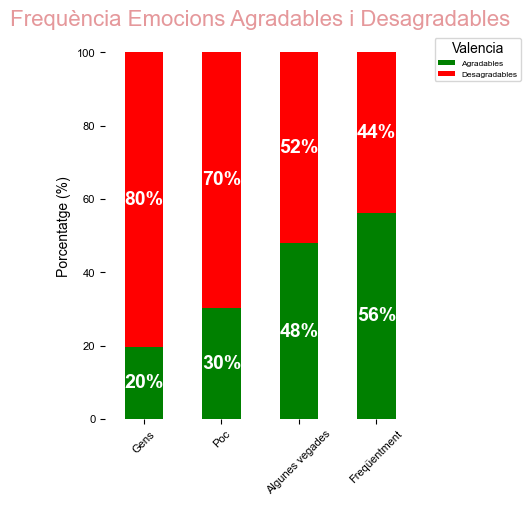

In [19]:
# Obtener las columnas del DataFrame como tuplas
columnas_flat = SEJ_conciencia_sentir_p1.columns.to_flat_index()

# Filtrar las columnas que corresponden a emociones agradables y negativas
columnas_agradables = [col for col in columnas_flat if col in emociones_agradables]
columnas_desagradables = [col for col in columnas_flat if col in emociones_desagradables]

# Contar las frecuencias para emociones agradables
conteo_agradables = SEJ_conciencia_sentir_p1[columnas_agradables].apply(pd.Series.value_counts)

# Contar las frecuencias para emociones negativas
conteo_negativas = SEJ_conciencia_sentir_p1[columnas_desagradables].apply(pd.Series.value_counts)

# Sumar los conteos para cada tipo de frecuencia en las emociones agradables
frecuencias_agradables_totales = conteo_agradables.sum(axis=1)

# Sumar los conteos para cada tipo de frecuencia en las emociones negativas
frecuencias_negativas_totales = conteo_negativas.sum(axis=1)

# Crear DataFrame de frecuencias
df_frecuencias = pd.DataFrame({
    'Agradables': frecuencias_agradables_totales,
    'Desagradables': frecuencias_negativas_totales
}).fillna(0)

# Reordenar las filas del DataFrame según la secuencia deseada
secuencia_frecuencia_emociones = ['Gens', 'Poc', 'Algunes vegades', 'Freqüentment']
df_frecuencias = df_frecuencias.loc[secuencia_frecuencia_emociones]

# Convertir a porcentaje sobre el total de cada tipo de respuesta
df_frecuencias_perc = df_frecuencias.div(df_frecuencias.sum(axis=1), axis=0) * 100

# Crear gráfico de barras apiladas con porcentajes
fig, ax = plt.subplots(figsize=(4, 5)) # A4: figsize=(8.27, 11.69)
ax.set_frame_on(False)

# Graficar las barras apiladas
df_frecuencias_perc.plot(kind='bar', stacked=True, color=['green', 'red'], ax=ax)

# Añadir etiquetas de porcentaje dentro de las barras
for i, (pos, neg) in enumerate(zip(df_frecuencias_perc['Agradables'], df_frecuencias_perc['Desagradables'])):
    ax.text(i, pos / 2, f'{pos:.0f}%', ha='center', va='center', color='white', fontweight='bold',fontsize=14,fontfamily='Arial')
    ax.text(i, pos + (neg / 2), f'{neg:.0f}%', ha='center', va='center', color='white', fontweight='bold',fontsize=14,fontfamily='Arial')

# Añadir etiquetas y título
plt.title('Frequència Emocions Agradables i Desagradables', fontsize=16, color="#E5989B")
#plt.xlabel('Tipus de Resposta')
plt.ylabel('Porcentatge (%)')
plt.xticks(rotation=45)
ax.legend(title="Valencia", bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar gráfico
plt.show()

In [20]:
# Si se quiere guardar el gráfico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gráficos') 
# Guardar como PDF
fig.savefig(f'{savePath}/freqüencia_emocions_agradables_desagradables.pdf', format='pdf', bbox_inches='tight')

### **Gráficos de barras mostrando la distribución de frecuencias de cada emoción por categoria**

In [21]:
# Contar las frecuencias para todas las emociones y tipos de respuesta
conteo_emociones = SEJ_conciencia_sentir_p1[emociones_totales].apply(pd.Series.value_counts)

# Filtrar las frecuencias de las categorías de respuesta específicas
conteo_emociones_filtrado = conteo_emociones.loc[secuencia_frecuencia_emociones]

# Convertir las frecuencias a porcentajes para cada categoría (suma de cada categoría = 100%)
porcentajes_por_categoria = conteo_emociones_filtrado.div(conteo_emociones_filtrado.sum(axis=1), axis=0) * 100
porcentajes_por_emocion = conteo_emociones_filtrado.div(conteo_emociones_filtrado.sum(axis=0), axis=1) * 100


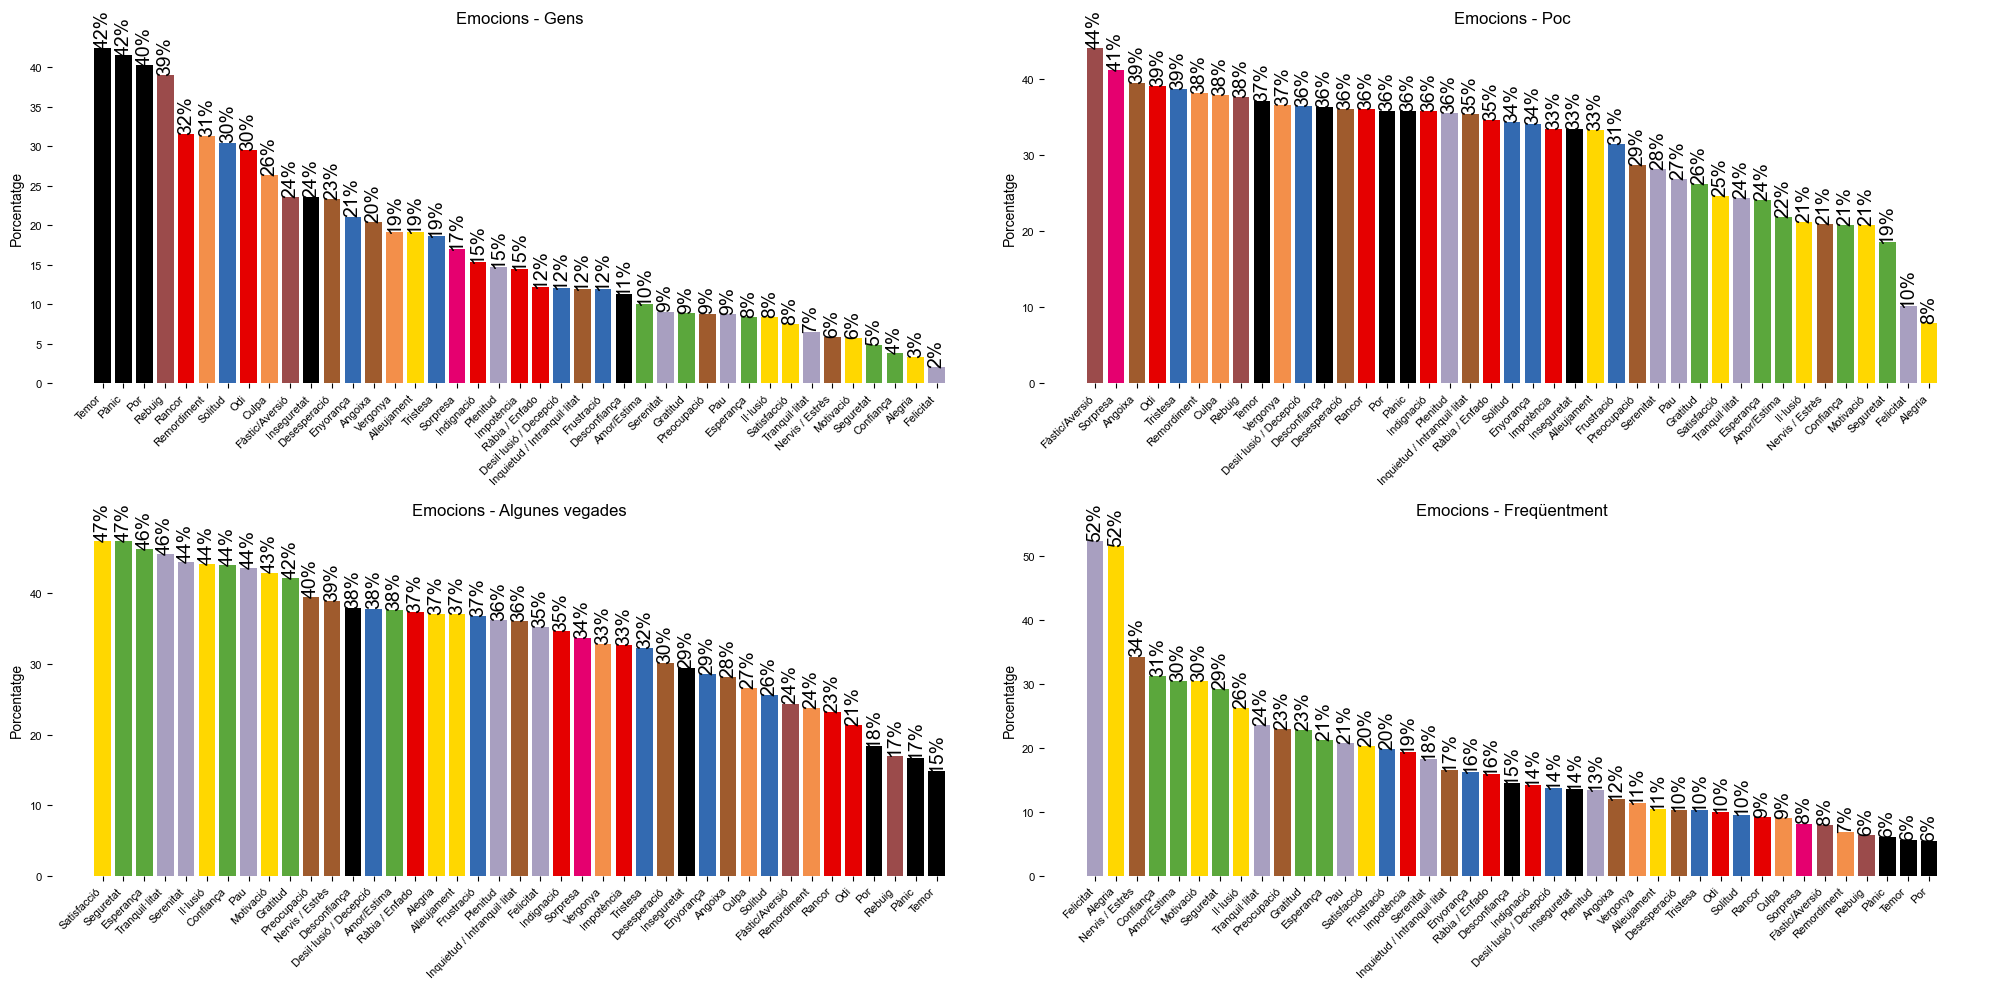

In [22]:
# Crear subgráficos
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
axs = axs.flatten()  # Aplanar el arreglo de ejes para iterar fácilmente

for i, category in enumerate(porcentajes_por_emocion.index):
    # Ordenar los valores en orden descendente
    sorted_values = porcentajes_por_emocion.loc[category].sort_values(ascending=False)
    
    # Graficar con los colores del diccionario
    bars = axs[i].bar(sorted_values.index, sorted_values.values, 
                      color=[color_dict[emotion] for emotion in sorted_values.index])
    
    # Personalizar gráfico
    axs[i].set_title(f'Emocions - {category}')
    axs[i].set_ylabel('Porcentatge')
    
    # Establecer ticks y etiquetas
    axs[i].set_xticks(range(len(sorted_values.index)))  # Fijar posiciones de los ticks
    axs[i].set_xticklabels(sorted_values.index, rotation=45, ha='right')  # Etiquetas de los ticks

    # Añadir porcentajes encima de las barras en vertical
    for bar in bars:
        height = bar.get_height()
        axs[i].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}%', 
                     ha='center', va='bottom', rotation=90,fontsize=14,fontfamily='Arial')  # Texto en vertical
        
    axs[i].set_frame_on(False) 

plt.tight_layout()  # Ajustar el espacio entre gráficos
plt.show()


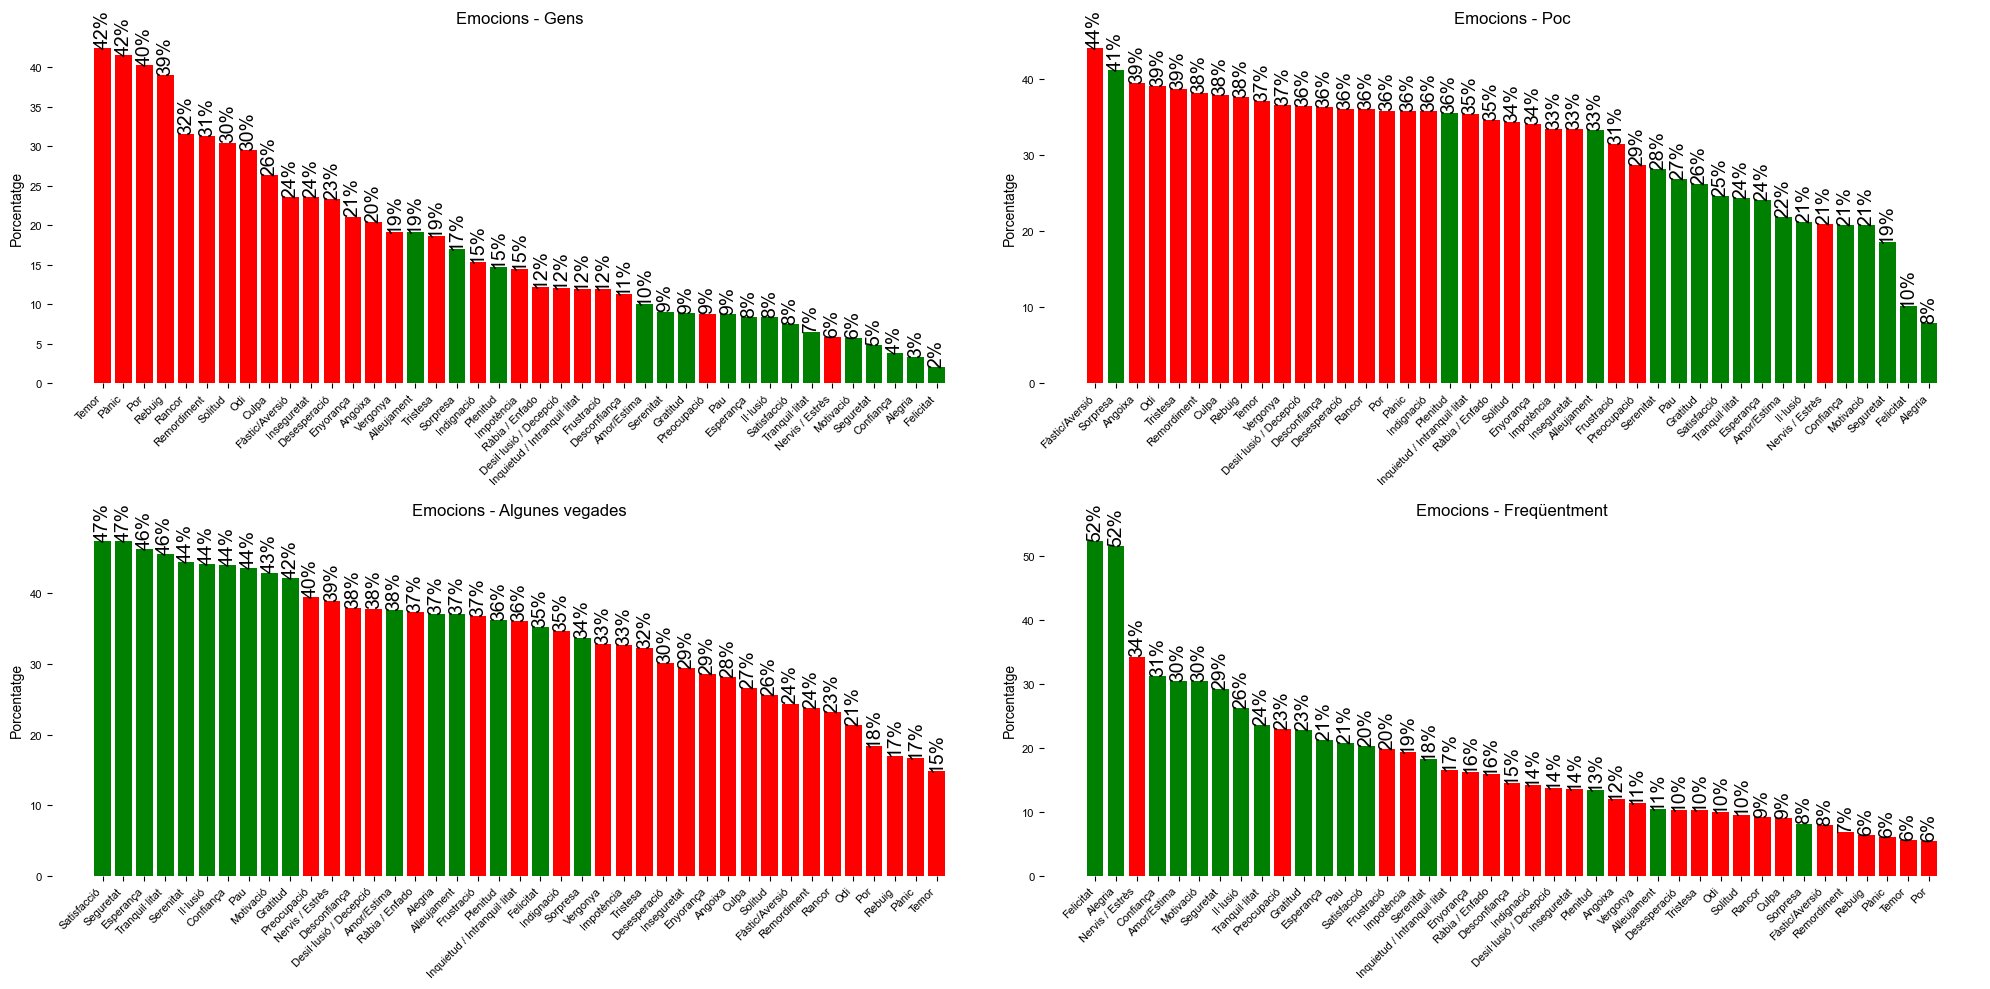

In [23]:
# Crear subgráficos
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
axs = axs.flatten()  # Aplanar el arreglo de ejes para iterar fácilmente

for i, category in enumerate(porcentajes_por_emocion.index):
    # Ordenar los valores en orden descendente
    sorted_values = porcentajes_por_emocion.loc[category].sort_values(ascending=False)
    
    # Graficar con los colores según emociones agradables/negativas
    bars = axs[i].bar(sorted_values.index, sorted_values.values, 
                      color=['green' if emotion in emociones_agradables else 'red' if emotion in emociones_desagradables else 'gray' 
                             for emotion in sorted_values.index])
    
    # Personalizar gráfico
    axs[i].set_title(f'Emocions - {category}')
    axs[i].set_ylabel('Porcentatge')
    
    # Establecer ticks y etiquetas
    axs[i].set_xticks(range(len(sorted_values.index)))  # Fijar posiciones de los ticks
    axs[i].set_xticklabels(sorted_values.index, rotation=45, ha='right')  # Etiquetas de los ticks

    # Añadir porcentajes encima de las barras en vertical
    for bar in bars:
        height = bar.get_height()
        axs[i].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}%', 
                     ha='center', va='bottom', rotation=90, fontsize=14, fontfamily='Arial')  # Texto en vertical
        
    axs[i].set_frame_on(False) 

plt.tight_layout()  # Ajustar el espacio entre gráficos
plt.show()

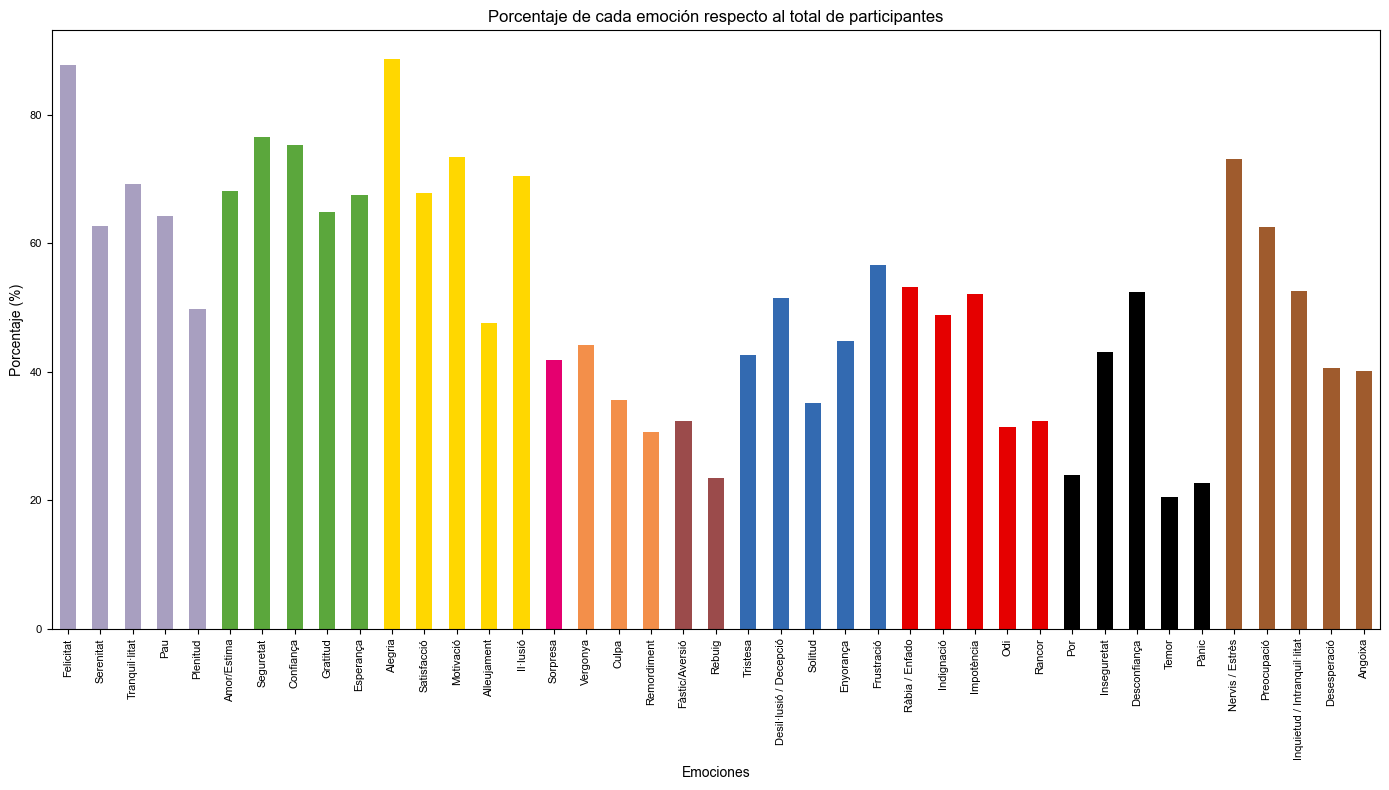

In [24]:
# Contar la frecuencia de cada emoción (columnas)
frecuencias_emociones = SEJ_conciencia_sentir_combined.sum()
total_participants = len(SEJ_conciencia_sentir_combined)

# Calcular los porcentajes
porcentajes_emociones = (frecuencias_emociones / total_participants) * 100

# Crear una lista de emociones ordenadas según el diccionario de familias
emociones_ordenadas = []
for familia, emociones in families_emocions.items():
    emociones_ordenadas.extend(emociones)

# Filtrar y reordenar los porcentajes y colores según emociones_ordenadas
porcentajes_ordenados = porcentajes_emociones[emociones_ordenadas]
colores_ordenados = [color_dict[emocion] for emocion in emociones_ordenadas]

# Crear un gráfico de barras
plt.figure(figsize=(14, 8))
porcentajes_ordenados.plot(kind='bar', color=colores_ordenados)

# Añadir etiquetas y título
plt.title('Porcentaje de cada emoción respecto al total de participantes')
plt.xlabel('Emociones')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=90)

# Mostrar gráfico
plt.tight_layout()
plt.show()


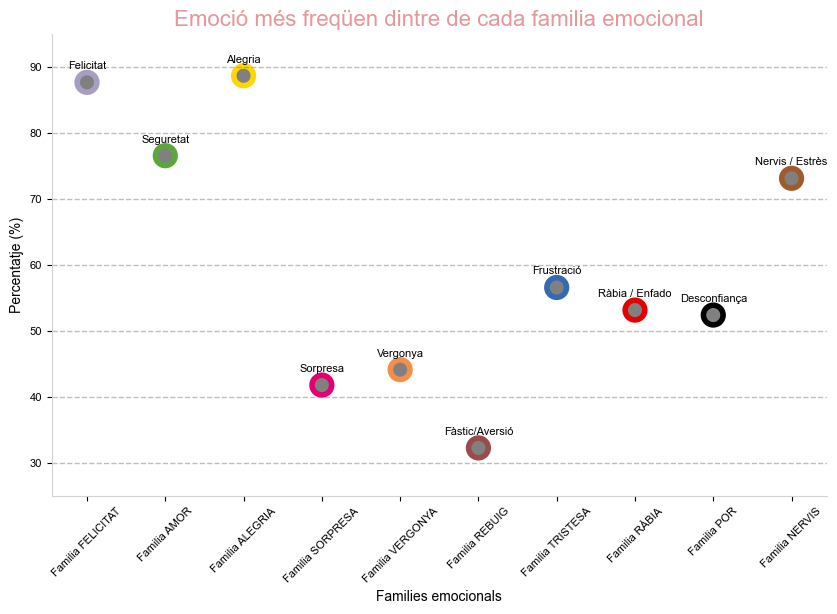

In [99]:
# Contar la frecuencia de cada emoción
frecuencias_emociones = SEJ_conciencia_sentir_combined.sum()
total_participants = len(SEJ_conciencia_sentir_combined)

# Calcular los porcentajes
porcentajes_emociones = (frecuencias_emociones / total_participants) * 100

# Encontrar la emoción con mayor porcentaje dentro de cada familia emocional
max_emociones_por_familia = {}
for familia, emociones in families_emocions.items():
    # Filtrar las emociones dentro de esta familia
    porcentajes_familia = porcentajes_emociones[emociones]
    
    # Seleccionar la emoción con el mayor porcentaje
    emocion_max = porcentajes_familia.idxmax()
    porcentaje_max = porcentajes_familia.max()
    
    # Guardar la emoción y su porcentaje
    max_emociones_por_familia[familia] = (emocion_max, porcentaje_max)

# Extraer datos para graficar
familias = list(max_emociones_por_familia.keys())
emociones_max = [max_emociones_por_familia[fam][0] for fam in familias]
porcentajes_max = [max_emociones_por_familia[fam][1] for fam in familias]
colores = [color_dict[emocion] for emocion in emociones_max]

# Crear la figura y los ejes con un handle "fig"
fig, ax = plt.subplots(figsize=(10, 6))

# Crear el scatter plot (círculos) con bordes más gruesos
ax.scatter(familias, porcentajes_max, s=200, c='grey', alpha=1, edgecolors=colores, linewidth=4)

# Añadir etiquetas con los nombres de las emociones sobre los círculos
for i, emocion in enumerate(emociones_max):
    ax.text(familias[i], porcentajes_max[i] + 2, emocion, ha='center', fontsize=8)

# Configurar etiquetas y título
ax.set_title('Emoció més freqüen dintre de cada familia emocional', fontsize=16, color="#E5989B")
ax.set_xlabel('Families emocionals')
ax.set_ylabel('Percentatje (%)')
ax.set_xticks(range(len(familias)))
ax.set_xticklabels(familias, rotation=45)

# Mejorar la estética del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("#D3D3D3")
ax.spines['bottom'].set_color("#D3D3D3")
#ax.grid(axis='y', linestyle='dashed', alpha=0.5)
ax.set_ylim(25, 95)
for y in ax.get_yticks():
    ax.axhline(y=y, color='gray', linestyle='dashed', alpha=0.5, linewidth=1)

# Mostrar gráfico
plt.show()



### Comparación SEJ21 y SEJ24

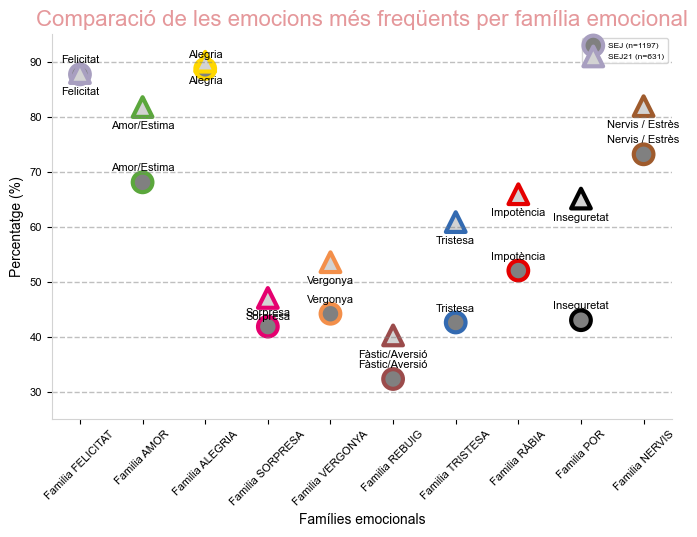

In [107]:
import matplotlib.pyplot as plt

# Comptar la freqüència de cada emoció en SEJ21
freq_emocions_SEJ21 = SEJ21_conciencia_sentir_combined.sum()
percentatges_SEJ21 = (freq_emocions_SEJ21 / len(SEJ21_conciencia_sentir_combined)) * 100

# Trobar l’emoció més freqüent dins de cada família en SEJ21
emocions_SEJ21 = {}
percentatges_max_SEJ21 = {}

for familia, emocions in families_emocions.items():
    emocion_max = percentatges_SEJ21[emocions].idxmax()  # Emoció més freqüent dins la família en SEJ21
    percentatge_max = percentatges_SEJ21[emocion_max]
    
    emocions_SEJ21[familia] = emocion_max
    percentatges_max_SEJ21[familia] = percentatge_max

# Ara, mirem aquestes mateixes emocions a SEJ
freq_emocions_SEJ = SEJ_conciencia_sentir_combined.sum()
percentatges_SEJ = (freq_emocions_SEJ / len(SEJ_conciencia_sentir_combined)) * 100

percentatges_max_SEJ = {fam: percentatges_SEJ[emocions_SEJ21[fam]] for fam in families_emocions}

# Extreure dades per a la gràfica
families = list(emocions_SEJ21.keys())

# Obtenir els valors per a cada dataset
emocions = [emocions_SEJ21[fam] for fam in families]
percentatges_SEJ = [percentatges_max_SEJ[fam] for fam in families]
percentatges_SEJ21 = [percentatges_max_SEJ21[fam] for fam in families]

# Colors de les vores segons l’emoció
colors = [color_dict[emocion] for emocion in emocions]

# Crear la figura i els eixos
fig, ax = plt.subplots(figsize=(8, 5))

# Scatter plot per a SEJ_conciencia_sentir_combined (cercles)
ax.scatter(families, percentatges_SEJ, s=200, c='grey', edgecolors=colors, linewidth=3, marker='o', label=f"SEJ (n={len(SEJ_conciencia_sentir_combined)})")

# Scatter plot per a SEJ21_conciencia_sentir_combined (triangles)
ax.scatter(families, percentatges_SEJ21, s=200, c='lightgrey', edgecolors=colors, linewidth=3, marker='^', label=f"SEJ21 (n={len(SEJ21_conciencia_sentir_combined)})")

# Afegir etiquetes amb els noms de les emocions
for i in range(len(families)):
    ax.text(families[i], percentatges_SEJ[i] + 2, emocions[i], ha='center', fontsize=8, color='black')
    ax.text(families[i], percentatges_SEJ21[i] - 4, emocions[i], ha='center', fontsize=8, color='black')

# Configurar etiquetes i títol
ax.set_title('Comparació de les emocions més freqüents per família emocional', fontsize=16, color="#E5989B")
ax.set_xlabel('Famílies emocionals')
ax.set_ylabel('Percentatge (%)')
ax.set_xticks(range(len(families)))
ax.set_xticklabels(families, rotation=45)

# Millorar l'estètica del gràfic
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("#D3D3D3")
ax.spines['bottom'].set_color("#D3D3D3")
ax.set_ylim(25, 95)
for y in ax.get_yticks():
    ax.axhline(y=y, color='gray', linestyle='dashed', alpha=0.5, linewidth=1)

# Afegir llegenda
ax.legend()

# Mostrar gràfic
plt.show()


In [108]:
# Si se quiere guardar el gráfico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gráficos') 
# Guardar como PDF en tamaño 
fig.savefig(f'{savePath}/SEJ21_SEJ24_frequencia_families_emocions.pdf', format='pdf', bbox_inches='tight')

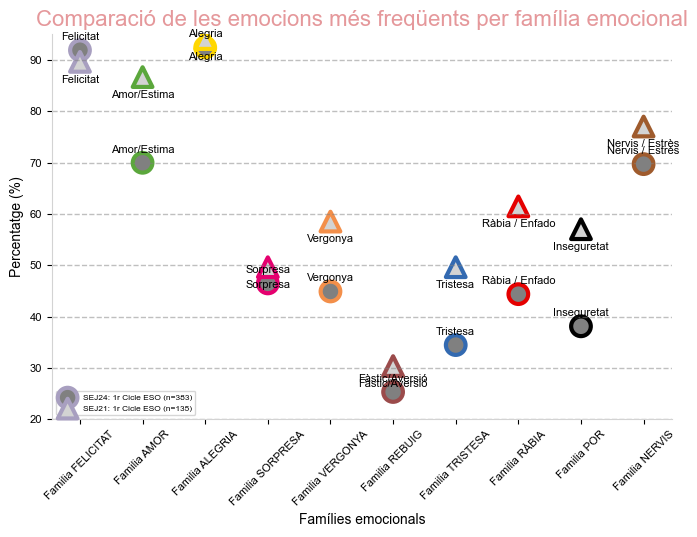

In [105]:
# FILTRAR ELS DATAFRAMES PRIMER
primer_cicle_data = SEJ_conciencia_sentir_combined.loc[primer_cicle_ESO_idx]
SEJ21_primer_cicle_data = SEJ21_conciencia_sentir_combined.loc[SEJ21_primer_cicle_ESO_idx]

# Comptar la freqüència de cada emoció en SEJ21 (filtrat)
freq_emocions_SEJ21 = SEJ21_primer_cicle_data.sum()
percentatges_SEJ21 = (freq_emocions_SEJ21 / len(SEJ21_primer_cicle_data)) * 100

# Trobar l’emoció més freqüent dins de cada família en SEJ21
emocions_SEJ21 = {}
percentatges_max_SEJ21 = {}

for familia, emocions in families_emocions.items():
    emocion_max = percentatges_SEJ21[emocions].idxmax()  # Emoció més freqüent dins la família en SEJ21
    percentatge_max = percentatges_SEJ21[emocion_max]
    
    emocions_SEJ21[familia] = emocion_max
    percentatges_max_SEJ21[familia] = percentatge_max

# Ara, mirem aquestes mateixes emocions a SEJ (filtrat)
freq_emocions_SEJ = primer_cicle_data.sum()
percentatges_SEJ = (freq_emocions_SEJ / len(primer_cicle_data)) * 100

percentatges_max_SEJ = {fam: percentatges_SEJ[emocions_SEJ21[fam]] for fam in families_emocions}

# Extreure dades per a la gràfica
families = list(emocions_SEJ21.keys())

# Obtenir els valors per a cada dataset
emocions = [emocions_SEJ21[fam] for fam in families]
percentatges_SEJ = [percentatges_max_SEJ[fam] for fam in families]
percentatges_SEJ21 = [percentatges_max_SEJ21[fam] for fam in families]

# Colors de les vores segons l’emoció
colors = [color_dict[emocion] for emocion in emocions]

# Crear la figura i els eixos
fig, ax = plt.subplots(figsize=(8, 5))

# Scatter plot per a SEJ_conciencia_sentir_combined (cercles)
ax.scatter(families, percentatges_SEJ, s=200, c='grey', edgecolors=colors, linewidth=3, marker='o', label=f"SEJ (n={len(primer_cicle_data)})")

# Scatter plot per a SEJ21_conciencia_sentir_combined (triangles)
ax.scatter(families, percentatges_SEJ21, s=200, c='lightgrey', edgecolors=colors, linewidth=3, marker='^', label=f"SEJ21 (n={len(SEJ21_primer_cicle_data)})")

# Afegir etiquetes amb els noms de les emocions
for i in range(len(families)):
    ax.text(families[i], percentatges_SEJ[i] + 2, emocions[i], ha='center', fontsize=8, color='black')
    ax.text(families[i], percentatges_SEJ21[i] - 4, emocions[i], ha='center', fontsize=8, color='black')

# Configurar etiquetes i títol
ax.set_title('Comparació de les emocions més freqüents per família emocional', fontsize=16, color="#E5989B")
ax.set_xlabel('Famílies emocionals')
ax.set_ylabel('Percentatge (%)')
ax.set_xticks(range(len(families)))
ax.set_xticklabels(families, rotation=45)

# Millorar l'estètica del gràfic
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("#D3D3D3")
ax.spines['bottom'].set_color("#D3D3D3")
ax.set_ylim(20, 95)

# Afegir línies horitzontals en els ticks del Y
for y in ax.get_yticks():
    ax.axhline(y=y, color='gray', linestyle='dashed', alpha=0.5, linewidth=1)

# Afegir llegenda
# Añadir leyenda
ax.legend([
    f"SEJ24: 1r Cicle ESO (n={len(primer_cicle_data)})",
    f"SEJ21: 1r Cicle ESO (n={len(SEJ21_primer_cicle_data)})"
])

# Mostrar gràfic
plt.show()


In [106]:
# Si se quiere guardar el gráfico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gráficos') 
# Guardar como PDF en tamaño 
fig.savefig(f'{savePath}/SEJ21_SEJ24_1er_cicle_ESO_frequencia_families_emocions.pdf', format='pdf', bbox_inches='tight')

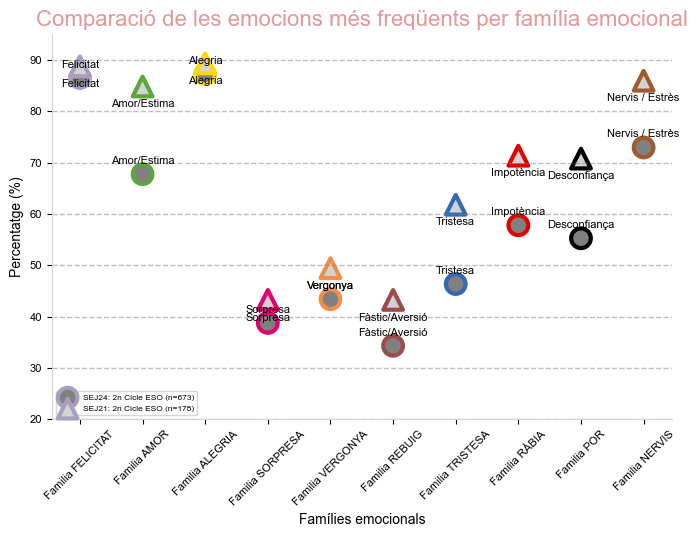

In [109]:
# FILTRAR ELS DATAFRAMES PRIMER
segon_cicle_data = SEJ_conciencia_sentir_combined.loc[segon_cicle_ESO_idx]
SEJ21_segon_cicle_data = SEJ21_conciencia_sentir_combined.loc[SEJ21_segon_cicle_ESO_idx]

# Comptar la freqüència de cada emoció en SEJ21 (filtrat)
freq_emocions_SEJ21 = SEJ21_segon_cicle_data.sum()
percentatges_SEJ21 = (freq_emocions_SEJ21 / len(SEJ21_segon_cicle_data)) * 100

# Trobar l’emoció més freqüent dins de cada família en SEJ21
emocions_SEJ21 = {}
percentatges_max_SEJ21 = {}

for familia, emocions in families_emocions.items():
    emocion_max = percentatges_SEJ21[emocions].idxmax()  # Emoció més freqüent dins la família en SEJ21
    percentatge_max = percentatges_SEJ21[emocion_max]
    
    emocions_SEJ21[familia] = emocion_max
    percentatges_max_SEJ21[familia] = percentatge_max

# Ara, mirem aquestes mateixes emocions a SEJ (filtrat)
freq_emocions_SEJ = segon_cicle_data.sum()
percentatges_SEJ = (freq_emocions_SEJ / len(segon_cicle_data)) * 100

percentatges_max_SEJ = {fam: percentatges_SEJ[emocions_SEJ21[fam]] for fam in families_emocions}

# Extreure dades per a la gràfica
families = list(emocions_SEJ21.keys())

# Obtenir els valors per a cada dataset
emocions = [emocions_SEJ21[fam] for fam in families]
percentatges_SEJ = [percentatges_max_SEJ[fam] for fam in families]
percentatges_SEJ21 = [percentatges_max_SEJ21[fam] for fam in families]

# Colors de les vores segons l’emoció
colors = [color_dict[emocion] for emocion in emocions]

# Crear la figura i els eixos
fig, ax = plt.subplots(figsize=(8, 5))

# Scatter plot per a SEJ_conciencia_sentir_combined (cercles)
ax.scatter(families, percentatges_SEJ, s=200, c='grey', edgecolors=colors, linewidth=3, marker='o', label=f"SEJ (n={len(segon_cicle_data)})")

# Scatter plot per a SEJ21_conciencia_sentir_combined (triangles)
ax.scatter(families, percentatges_SEJ21, s=200, c='lightgrey', edgecolors=colors, linewidth=3, marker='^', label=f"SEJ21 (n={len(SEJ21_segon_cicle_data)})")

# Afegir etiquetes amb els noms de les emocions
for i in range(len(families)):
    ax.text(families[i], percentatges_SEJ[i] + 2, emocions[i], ha='center', fontsize=8, color='black')
    ax.text(families[i], percentatges_SEJ21[i] - 4, emocions[i], ha='center', fontsize=8, color='black')

# Configurar etiquetes i títol
ax.set_title('Comparació de les emocions més freqüents per família emocional', fontsize=16, color="#E5989B")
ax.set_xlabel('Famílies emocionals')
ax.set_ylabel('Percentatge (%)')
ax.set_xticks(range(len(families)))
ax.set_xticklabels(families, rotation=45)

# Millorar l'estètica del gràfic
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("#D3D3D3")
ax.spines['bottom'].set_color("#D3D3D3")
ax.set_ylim(20, 95)

# Afegir línies horitzontals en els ticks del Y
for y in ax.get_yticks():
    ax.axhline(y=y, color='gray', linestyle='dashed', alpha=0.5, linewidth=1)

# Afegir llegenda
# Añadir leyenda
ax.legend([
    f"SEJ24: 2n Cicle ESO (n={len(segon_cicle_data)})",
    f"SEJ21: 2n Cicle ESO (n={len(SEJ21_segon_cicle_data)})"
])

# Mostrar gràfic
plt.show()

In [110]:
# Si se quiere guardar el gráfico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gráficos') 
# Guardar como PDF en tamaño 
fig.savefig(f'{savePath}/SEJ21_SEJ24_2n_cicle_ESO_frequencia_families_emocions.pdf', format='pdf', bbox_inches='tight')

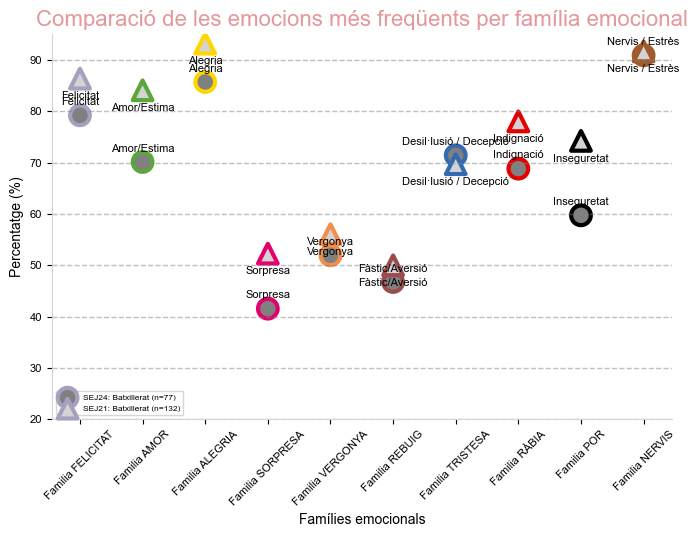

In [112]:
# FILTRAR ELS DATAFRAMES PRIMER
batxillerat_data = SEJ_conciencia_sentir_combined.loc[batxillerat_idx]
SEJ21_batxillerat_data = SEJ21_conciencia_sentir_combined.loc[SEJ21_batxillerat_idx]

# Comptar la freqüència de cada emoció en SEJ21 (filtrat)
freq_emocions_SEJ21 = SEJ21_batxillerat_data.sum()
percentatges_SEJ21 = (freq_emocions_SEJ21 / len(SEJ21_batxillerat_data)) * 100

# Trobar l’emoció més freqüent dins de cada família en SEJ21
emocions_SEJ21 = {}
percentatges_max_SEJ21 = {}

for familia, emocions in families_emocions.items():
    emocion_max = percentatges_SEJ21[emocions].idxmax()  # Emoció més freqüent dins la família en SEJ21
    percentatge_max = percentatges_SEJ21[emocion_max]
    
    emocions_SEJ21[familia] = emocion_max
    percentatges_max_SEJ21[familia] = percentatge_max

# Ara, mirem aquestes mateixes emocions a SEJ (filtrat)
freq_emocions_SEJ = batxillerat_data.sum()
percentatges_SEJ = (freq_emocions_SEJ / len(batxillerat_data)) * 100

percentatges_max_SEJ = {fam: percentatges_SEJ[emocions_SEJ21[fam]] for fam in families_emocions}

# Extreure dades per a la gràfica
families = list(emocions_SEJ21.keys())

# Obtenir els valors per a cada dataset
emocions = [emocions_SEJ21[fam] for fam in families]
percentatges_SEJ = [percentatges_max_SEJ[fam] for fam in families]
percentatges_SEJ21 = [percentatges_max_SEJ21[fam] for fam in families]

# Colors de les vores segons l’emoció
colors = [color_dict[emocion] for emocion in emocions]

# Crear la figura i els eixos
fig, ax = plt.subplots(figsize=(8, 5))

# Scatter plot per a SEJ_conciencia_sentir_combined (cercles)
ax.scatter(families, percentatges_SEJ, s=200, c='grey', edgecolors=colors, linewidth=3, marker='o', label=f"SEJ (n={len(batxillerat_data)})")

# Scatter plot per a SEJ21_conciencia_sentir_combined (triangles)
ax.scatter(families, percentatges_SEJ21, s=200, c='lightgrey', edgecolors=colors, linewidth=3, marker='^', label=f"SEJ21 (n={len(SEJ21_batxillerat_data)})")

# Afegir etiquetes amb els noms de les emocions
for i in range(len(families)):
    ax.text(families[i], percentatges_SEJ[i] + 2, emocions[i], ha='center', fontsize=8, color='black')
    ax.text(families[i], percentatges_SEJ21[i] - 4, emocions[i], ha='center', fontsize=8, color='black')

# Configurar etiquetes i títol
ax.set_title('Comparació de les emocions més freqüents per família emocional', fontsize=16, color="#E5989B")
ax.set_xlabel('Famílies emocionals')
ax.set_ylabel('Percentatge (%)')
ax.set_xticks(range(len(families)))
ax.set_xticklabels(families, rotation=45)

# Millorar l'estètica del gràfic
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("#D3D3D3")
ax.spines['bottom'].set_color("#D3D3D3")
ax.set_ylim(20, 95)

# Afegir línies horitzontals en els ticks del Y
for y in ax.get_yticks():
    ax.axhline(y=y, color='gray', linestyle='dashed', alpha=0.5, linewidth=1)

# Afegir llegenda
# Añadir leyenda
ax.legend([
    f"SEJ24: Batxillerat (n={len(batxillerat_data)})",
    f"SEJ21: Batxillerat (n={len(SEJ21_batxillerat_data)})"
])

# Mostrar gràfic
plt.show()

In [113]:
# Si se quiere guardar el gráfico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gráficos') 
# Guardar como PDF en tamaño 
fig.savefig(f'{savePath}/SEJ21_SEJ24_batxillerat_frequencia_families_emocions.pdf', format='pdf', bbox_inches='tight')

### Comparación grupos en SEJ24

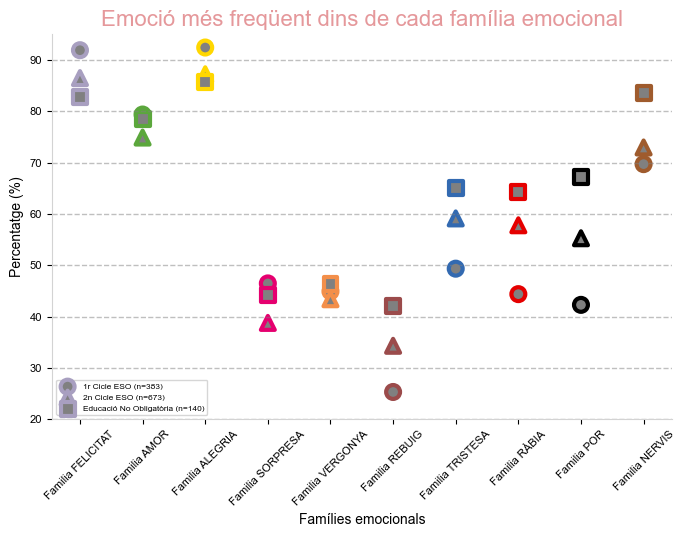

In [114]:
import matplotlib.pyplot as plt


# Filtrar les dades per als tres grups
primer_cicle_data = SEJ_conciencia_sentir_combined.loc[primer_cicle_ESO_idx]
segon_cicle_data = SEJ_conciencia_sentir_combined.loc[segon_cicle_ESO_idx]
educacio_no_obligatoria_data = SEJ_conciencia_sentir_combined.loc[educació_no_obligatoria_idx]

# Comptar la freqüència de cada emoció en cada grup
frequencies_primer = primer_cicle_data.sum()
frequencies_segon = segon_cicle_data.sum()
frequencies_educacio = educacio_no_obligatoria_data.sum()

# Calcular els percentatges en cada grup
percentatges_primer = (frequencies_primer / len(primer_cicle_data)) * 100
percentatges_segon = (frequencies_segon / len(segon_cicle_data)) * 100
percentatges_educacio = (frequencies_educacio / len(educacio_no_obligatoria_data)) * 100

# Trobar l’emoció amb el percentatge més alt dins de cada família emocional per a cada grup
max_emocions_primer = {}
max_emocions_segon = {}
max_emocions_educacio = {}

for familia, emocions in families_emocions.items():
    max_emocions_primer[familia] = (percentatges_primer[emocions].idxmax(), percentatges_primer[emocions].max())
    max_emocions_segon[familia] = (percentatges_segon[emocions].idxmax(), percentatges_segon[emocions].max())
    max_emocions_educacio[familia] = (percentatges_educacio[emocions].idxmax(), percentatges_educacio[emocions].max())

# Extreure dades per a la gràfica
families = list(max_emocions_primer.keys())

emocions_primer = [max_emocions_primer[fam][0] for fam in families]
percentatges_primer = [max_emocions_primer[fam][1] for fam in families]

emocions_segon = [max_emocions_segon[fam][0] for fam in families]
percentatges_segon = [max_emocions_segon[fam][1] for fam in families]

emocions_educacio = [max_emocions_educacio[fam][0] for fam in families]
percentatges_educacio = [max_emocions_educacio[fam][1] for fam in families]

# Colors de les vores segons l’emoció
colors_primer = [color_dict[emocion] for emocion in emocions_primer]
colors_segon = [color_dict[emocion] for emocion in emocions_segon]
colors_educacio = [color_dict[emocion] for emocion in emocions_educacio]

# Crear la figura i els eixos
fig, ax = plt.subplots(figsize=(8, 5))

# Scatter plot per a cada grup amb formes diferents
ax.scatter(families, percentatges_primer, s=100, c='gray', edgecolors=colors_primer, linewidth=3, marker='o', label="1r Cicle ESO")
ax.scatter(families, percentatges_segon, s=100, c='gray', edgecolors=colors_segon, linewidth=3, marker='^', label="2n Cicle ESO")
ax.scatter(families, percentatges_educacio, s=100, c='gray', edgecolors=colors_educacio, linewidth=3, marker='s', label="Educació No Obligatòria")

# Afegir etiquetes amb els noms de les emocions
#for i in range(len(families)):
    #ax.text(families[i], percentatges_primer[i] + 2, emocions_primer[i], ha='center', fontsize=8, color='black')
    #ax.text(families[i], percentatges_segon[i] - 4, emocions_segon[i], ha='center', fontsize=8, color='black')
    #ax.text(families[i], percentatges_educacio[i] - 8, emocions_educacio[i], ha='center', fontsize=8, color='black')

# Configuració d’etiquetes i títol
ax.set_title("Emoció més freqüent dins de cada família emocional", fontsize=16, color="#E5989B")
ax.set_xlabel("Famílies emocionals")
ax.set_ylabel("Percentatge (%)")
ax.set_xticks(range(len(families)))
ax.set_xticklabels(families, rotation=45)

# Millorar l'estètica del gràfic
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("#D3D3D3")
ax.spines['bottom'].set_color("#D3D3D3")
ax.set_ylim(20, 95)
for y in ax.get_yticks():
    ax.axhline(y=y, color='gray', linestyle='dashed', alpha=0.5, linewidth=1)

# Afegir llegenda
ax.legend([
    f"1r Cicle ESO (n={len(primer_cicle_data)})",
    f"2n Cicle ESO (n={len(segon_cicle_data)})",
    f"Educació No Obligatòria (n={len(educacio_no_obligatoria_data)})"
])
# Mostrar gràfic
plt.show()


In [115]:
# Si se quiere guardar el gráfico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gráficos') 
# Guardar como PDF en tamaño 
fig.savefig(f'{savePath}/1er_cicle_2nd_cicle_ESO_no_obligarotia_frequencia_families_emocions.pdf', format='pdf', bbox_inches='tight')

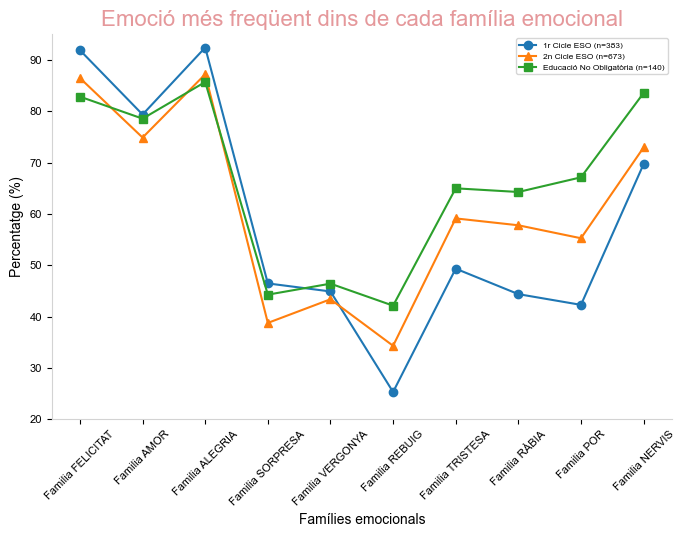

In [59]:
import matplotlib.pyplot as plt

# Filtrar les dades per als tres grups
primer_cicle_data = SEJ_conciencia_sentir_combined.loc[primer_cicle_ESO_idx]
segon_cicle_data = SEJ_conciencia_sentir_combined.loc[segon_cicle_ESO_idx]
educacio_no_obligatoria_data = SEJ_conciencia_sentir_combined.loc[educació_no_obligatoria_idx]

# Comptar la freqüència de cada emoció en cada grup
frequencies_primer = primer_cicle_data.sum()
frequencies_segon = segon_cicle_data.sum()
frequencies_educacio = educacio_no_obligatoria_data.sum()

# Calcular els percentatges en cada grup
percentatges_primer = (frequencies_primer / len(primer_cicle_data)) * 100
percentatges_segon = (frequencies_segon / len(segon_cicle_data)) * 100
percentatges_educacio = (frequencies_educacio / len(educacio_no_obligatoria_data)) * 100

# Trobar l’emoció amb el percentatge més alt dins de cada família emocional per a cada grup
max_emocions_primer = {}
max_emocions_segon = {}
max_emocions_educacio = {}

for familia, emocions in families_emocions.items():
    max_emocions_primer[familia] = (percentatges_primer[emocions].idxmax(), percentatges_primer[emocions].max())
    max_emocions_segon[familia] = (percentatges_segon[emocions].idxmax(), percentatges_segon[emocions].max())
    max_emocions_educacio[familia] = (percentatges_educacio[emocions].idxmax(), percentatges_educacio[emocions].max())

# Extreure dades per a la gràfica
families = list(max_emocions_primer.keys())

percentatges_primer = [max_emocions_primer[fam][1] for fam in families]
percentatges_segon = [max_emocions_segon[fam][1] for fam in families]
percentatges_educacio = [max_emocions_educacio[fam][1] for fam in families]

# Definir colors per a cada grup
color_primer = "#1f77b4"  # Blau
color_segon = "#ff7f0e"   # Taronja
color_educacio = "#2ca02c" # Verd

# Crear la figura i els eixos
fig, ax = plt.subplots(figsize=(8, 5))

# Dibuixar les línies per a cada grup
ax.plot(families, percentatges_primer, marker='o', linestyle='-', color=color_primer, label=f"1r Cicle ESO (n={len(primer_cicle_data)})")
ax.plot(families, percentatges_segon, marker='^', linestyle='-', color=color_segon, label=f"2n Cicle ESO (n={len(segon_cicle_data)})")
ax.plot(families, percentatges_educacio, marker='s', linestyle='-', color=color_educacio, label=f"Educació No Obligatòria (n={len(educacio_no_obligatoria_data)})")

# Configuració d’etiquetes i títol
ax.set_title("Emoció més freqüent dins de cada família emocional", fontsize=16, color="#E5989B")
ax.set_xlabel("Famílies emocionals")
ax.set_ylabel("Percentatge (%)")
ax.set_xticks(range(len(families)))
ax.set_xticklabels(families, rotation=45)

# Millorar l'estètica del gràfic
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("#D3D3D3")
ax.spines['bottom'].set_color("#D3D3D3")
ax.set_ylim(20, 95)

# Afegir llegenda
ax.legend()

# Mostrar gràfic
plt.show()


In [60]:
# Si se quiere guardar el gráfico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gráficos') 
# Guardar como PDF en tamaño 
fig.savefig(f'{savePath}/1er_cicle_2nd_cicle_ESO_no_obligarotia_frequencia_families_emocions_lineas.pdf', format='pdf', bbox_inches='tight')

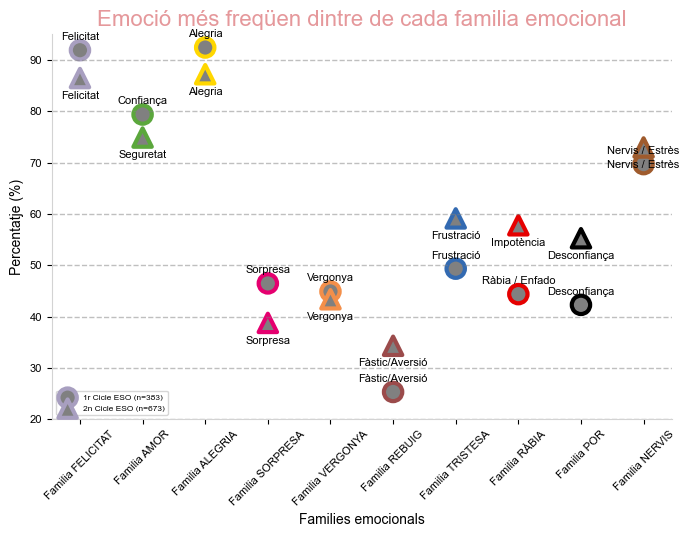

In [116]:
# Filtrar los datos para los dos grupos
primer_cicle_data = SEJ_conciencia_sentir_combined.loc[primer_cicle_ESO_idx]
segon_cicle_data = SEJ_conciencia_sentir_combined.loc[segon_cicle_ESO_idx]

# Contar la frecuencia de cada emoción en cada grupo
frecuencias_emociones_primer = primer_cicle_data.sum()
frecuencias_emociones_segon = segon_cicle_data.sum()

# Calcular los porcentajes en cada grupo
porcentajes_emociones_primer = (frecuencias_emociones_primer / len(primer_cicle_data)) * 100
porcentajes_emociones_segon = (frecuencias_emociones_segon / len(segon_cicle_data)) * 100

# Encontrar la emoción con mayor porcentaje dentro de cada familia emocional en cada grupo
max_emociones_por_familia_primer = {}
max_emociones_por_familia_segon = {}

for familia, emociones in families_emocions.items():
    # Seleccionar la emoción con el mayor porcentaje en cada grupo
    emocion_max_primer = porcentajes_emociones_primer[emociones].idxmax()
    porcentaje_max_primer = porcentajes_emociones_primer[emociones].max()
    
    emocion_max_segon = porcentajes_emociones_segon[emociones].idxmax()
    porcentaje_max_segon = porcentajes_emociones_segon[emociones].max()
    
    # Guardar en los diccionarios
    max_emociones_por_familia_primer[familia] = (emocion_max_primer, porcentaje_max_primer)
    max_emociones_por_familia_segon[familia] = (emocion_max_segon, porcentaje_max_segon)

# Extraer datos para graficar
familias = list(max_emociones_por_familia_primer.keys())

emociones_max_primer = [max_emociones_por_familia_primer[fam][0] for fam in familias]
porcentajes_max_primer = [max_emociones_por_familia_primer[fam][1] for fam in familias]

emociones_max_segon = [max_emociones_por_familia_segon[fam][0] for fam in familias]
porcentajes_max_segon = [max_emociones_por_familia_segon[fam][1] for fam in familias]

# Colores de bordes según la emoción
colores_primer = [color_dict[emocion] for emocion in emociones_max_primer]
colores_segon = [color_dict[emocion] for emocion in emociones_max_segon]

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(8, 5))

# Scatter plot para el primer ciclo (círculos)
ax.scatter(familias, porcentajes_max_primer, s=175, c='gray', edgecolors=colores_primer, linewidth=3, marker='o', label="1er Cicle ESO")

# Scatter plot para el segundo ciclo (triángulos)
ax.scatter(familias, porcentajes_max_segon, s=175, c='gray', edgecolors=colores_segon, linewidth=3, marker='^', label="2n Cicle ESO")

# Añadir etiquetas con los nombres de las emociones
for i, (emocion1, emocion2) in enumerate(zip(emociones_max_primer, emociones_max_segon)):
    ax.text(familias[i], porcentajes_max_primer[i] + 2, emocion1, ha='center', fontsize=8, color='black')
    ax.text(familias[i], porcentajes_max_segon[i] - 4, emocion2, ha='center', fontsize=8, color='black')

# Configurar etiquetas y título
ax.set_title('Emoció més freqüen dintre de cada familia emocional', fontsize=16, color="#E5989B")
ax.set_xlabel('Families emocionals')
ax.set_ylabel('Percentatje (%)')
ax.set_xticks(range(len(familias)))
ax.set_xticklabels(familias, rotation=45)

# Mejorar la estética del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("#D3D3D3")
ax.spines['bottom'].set_color("#D3D3D3")
ax.set_ylim(20, 95)
for y in ax.get_yticks():
    ax.axhline(y=y, color='gray', linestyle='dashed', alpha=0.5, linewidth=1)

# Añadir leyenda
ax.legend([
    f"1r Cicle ESO (n={len(primer_cicle_data)})",
    f"2n Cicle ESO (n={len(segon_cicle_data)})"
])
# Mostrar gráfico
plt.show()



In [117]:
# Si se quiere guardar el gráfico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gráficos') 
# Guardar como PDF en tamaño A4
fig.savefig(f'{savePath}/1er_cicle_2nd_cicle_ESO_frequencia_families_emocions.pdf', format='pdf', bbox_inches='tight')

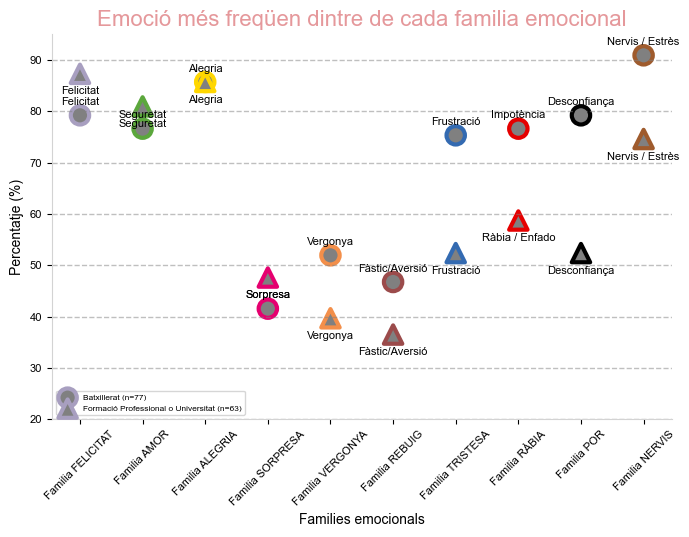

In [118]:
# Filtrar los datos para los dos grupos
batxillerat_data = SEJ_conciencia_sentir_combined.loc[batxillerat_idx]
fp_uni_data = SEJ_conciencia_sentir_combined.loc[fp_universitat_idx]

# Contar la frecuencia de cada emoción en cada grupo
frecuencias_emociones_primer = batxillerat_data.sum()
frecuencias_emociones_segon = fp_uni_data.sum()

# Calcular los porcentajes en cada grupo
porcentajes_emociones_primer = (frecuencias_emociones_primer / len(batxillerat_data)) * 100
porcentajes_emociones_segon = (frecuencias_emociones_segon / len(fp_uni_data)) * 100

# Encontrar la emoción con mayor porcentaje dentro de cada familia emocional en cada grupo
max_emociones_por_familia_primer = {}
max_emociones_por_familia_segon = {}

for familia, emociones in families_emocions.items():
    # Seleccionar la emoción con el mayor porcentaje en cada grupo
    emocion_max_primer = porcentajes_emociones_primer[emociones].idxmax()
    porcentaje_max_primer = porcentajes_emociones_primer[emociones].max()
    
    emocion_max_segon = porcentajes_emociones_segon[emociones].idxmax()
    porcentaje_max_segon = porcentajes_emociones_segon[emociones].max()
    
    # Guardar en los diccionarios
    max_emociones_por_familia_primer[familia] = (emocion_max_primer, porcentaje_max_primer)
    max_emociones_por_familia_segon[familia] = (emocion_max_segon, porcentaje_max_segon)

# Extraer datos para graficar
familias = list(max_emociones_por_familia_primer.keys())

emociones_max_primer = [max_emociones_por_familia_primer[fam][0] for fam in familias]
porcentajes_max_primer = [max_emociones_por_familia_primer[fam][1] for fam in familias]

emociones_max_segon = [max_emociones_por_familia_segon[fam][0] for fam in familias]
porcentajes_max_segon = [max_emociones_por_familia_segon[fam][1] for fam in familias]

# Colores de bordes según la emoción
colores_primer = [color_dict[emocion] for emocion in emociones_max_primer]
colores_segon = [color_dict[emocion] for emocion in emociones_max_segon]

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(8, 5))

# Scatter plot para el primer ciclo (círculos)
ax.scatter(familias, porcentajes_max_primer, s=175, c='gray', edgecolors=colores_primer, linewidth=3, marker='o', label="Batxillerat")

# Scatter plot para el segundo ciclo (triángulos)
ax.scatter(familias, porcentajes_max_segon, s=175, c='gray', edgecolors=colores_segon, linewidth=3, marker='^', label="Formació Professional o Universitat")

# Añadir etiquetas con los nombres de las emociones
for i, (emocion1, emocion2) in enumerate(zip(emociones_max_primer, emociones_max_segon)):
    ax.text(familias[i], porcentajes_max_primer[i] + 2, emocion1, ha='center', fontsize=8, color='black')
    ax.text(familias[i], porcentajes_max_segon[i] - 4, emocion2, ha='center', fontsize=8, color='black')

# Configurar etiquetas y título
ax.set_title('Emoció més freqüen dintre de cada familia emocional', fontsize=16, color="#E5989B")
ax.set_xlabel('Families emocionals')
ax.set_ylabel('Percentatje (%)')
ax.set_xticks(range(len(familias)))
ax.set_xticklabels(familias, rotation=45)

# Mejorar la estética del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("#D3D3D3")
ax.spines['bottom'].set_color("#D3D3D3")
ax.set_ylim(20, 95)
for y in ax.get_yticks():
    ax.axhline(y=y, color='gray', linestyle='dashed', alpha=0.5, linewidth=1)

# Añadir leyenda
ax.legend([
    f"Batxillerat (n={len(batxillerat_data)})",
    f"Formació Professional o Universitat (n={len(fp_uni_data)})"
])

# Mostrar gráfico
plt.show()


In [119]:
# Si se quiere guardar el gráfico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gráficos') 
# Guardar como PDF en tamaño A4
fig.savefig(f'{savePath}/Batx_FP_o_uni_frequencia_families_emocions.pdf', format='pdf', bbox_inches='tight')

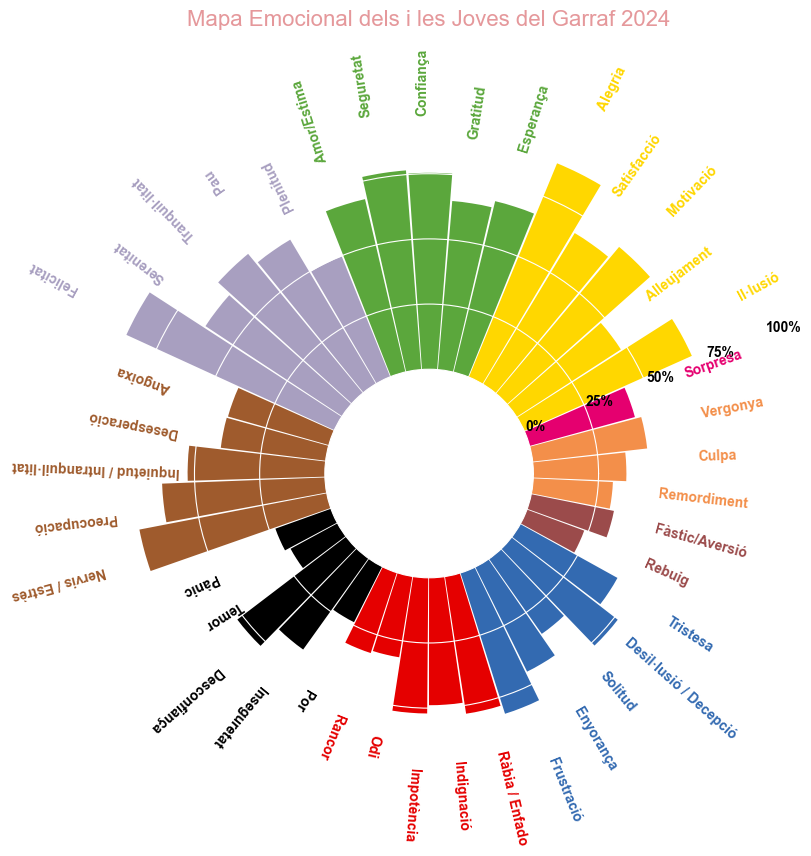

In [120]:
import numpy as np
import matplotlib.pyplot as plt

# Contar la frecuencia de cada emoción (columnas)
frecuencias_emociones = SEJ_conciencia_sentir_combined.sum()
total_participants = len(SEJ_conciencia_sentir_combined)

# Calcular los porcentajes
porcentajes_emociones = (frecuencias_emociones / total_participants) * 100

# Crear una lista de emociones ordenadas según el diccionario de familias
emociones_ordenadas = []
for familia, emociones in families_emocions.items():
    emociones_ordenadas.extend(emociones)

# Invertir el orden de las emociones para obtener una disposición en espejo
emociones_ordenadas = emociones_ordenadas[::-1]

# Filtrar y reordenar los porcentajes y colores según emociones_ordenadas
porcentajes_ordenados = porcentajes_emociones[emociones_ordenadas]
colores_ordenados = [color_dict[emocion] for emocion in emociones_ordenadas]

# Número de emociones
num_emociones = len(porcentajes_ordenados)

# Ángulos para cada barra (giro 180 grados sumando pi radianes)
theta = np.linspace(0.0, 2 * np.pi, num_emociones, endpoint=False) + np.pi - np.pi/9 

# Ancho de cada barra con separación
ancho_barra = (2 * np.pi / num_emociones) * 0.95  # Reducir el ancho de las barras al 95%

# Crear un gráfico polar
fig, ax = plt.subplots(figsize=(8.27, 11.69), subplot_kw={'projection': 'polar'})  # Tamaño A4 (DINA4)

# Crear las barras con bottom=40
bars = ax.bar(theta, porcentajes_ordenados, width=ancho_barra, color=colores_ordenados, bottom=40)

# Ajustar el radio mínimo y máximo
ax.set_ylim(0, max(porcentajes_ordenados) + 40)

# Eliminar líneas radiales
ax.spines['polar'].set_visible(False)
ax.grid(color='white', linestyle='-', linewidth=0.8)

# Definir los niveles circulares con la compensación de bottom=40
circular_levels = [40, 40 + 25, 40 + 50, 40 + 75, 40 + 100]  # Se suman a 40
ax.set_yticks(circular_levels)
ax.set_yticklabels([f'{int(level - 40)}%' for level in circular_levels], color='black', fontsize=10, fontweight='bold')

# Escribir el nombre de cada emoción alineado con la barra
for bar, emocion, color, angle in zip(bars, emociones_ordenadas, colores_ordenados, theta):
    height = bar.get_height()
    angle += ancho_barra / 32  # Centrar el texto en la barra
    rotation = np.degrees(angle)

    # Ajustar la rotación para que el texto sea legible
    ax.text(angle, height + 75, emocion, ha='center', va='bottom', 
            rotation=rotation, rotation_mode='anchor', color=color, fontsize=10, fontweight='bold')

# Estilizar el gráfico
ax.set_xticks([])  # Eliminar etiquetas de las emociones en el perímetro
ax.set_title('Mapa Emocional dels i les Joves del Garraf 2024', fontsize=16, color="#E5989B", pad=60)

# Mostrar gráfico
plt.tight_layout()
plt.show()


In [121]:
# Si se quiere guardar el gráfico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gráficos') 
# Guardar como PDF en tamaño A4
fig.savefig(f'{savePath}/equalitzador_emocional_frequencia_families_emocions.pdf', format='pdf', bbox_inches='tight')

#### **Añadir la frecuencia de emociones por etapa educativa**
Siguientes categorias:

- Primera etapa de la ESO
- Segunda etapa de la ESO
- Formació educativa no obligatoria

#### **Añadir la frecuencia de emociones por etapa postobligatorias**
Siguientes categorias:

- Batxillerat
- Formació Profesinal o Universitat


### **Matriz de correlación y dendograma con clustering hierarchico para mirar el grado de coorelación (concordancia) entre emociones**

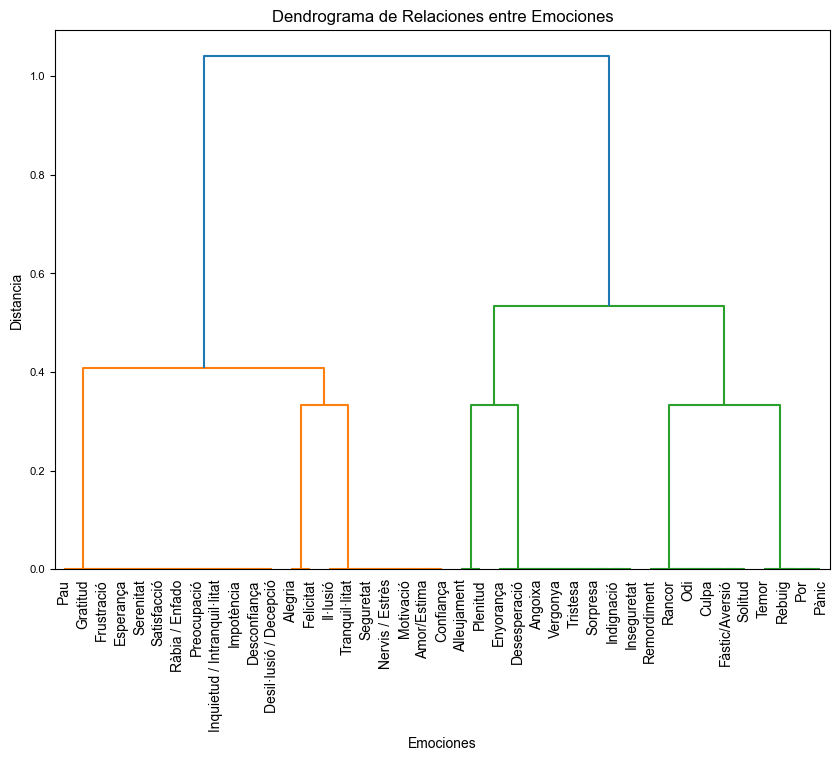

In [23]:
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as ssd

# Calcular la matriz de correlación de Kendall
kendall_corr = porcentajes_por_emocion.corr(method='kendall')
#kendall_corr = conteo_emociones_filtrado.corr(method='kendall')


# Convertir la matriz de correlación en una matriz de distancias
distance_matrix = 1 - kendall_corr

# Convertir la matriz cuadrada de distancias en una matriz condensada
condensed_distance = ssd.squareform(distance_matrix)

# Realizar el clustering jerárquico usando la matriz de distancias condensada
linkage_matrix = sch.linkage(condensed_distance, method='average')

# Obtener el orden de los grupos desde el dendrograma
dendro_order = sch.leaves_list(linkage_matrix)

# Reordenar la matriz de correlación
sorted_kendall_corr = kendall_corr.iloc[dendro_order, dendro_order]


# Dibujar el dendrograma
plt.figure(figsize=(10, 7))
dendro = sch.dendrogram(linkage_matrix, labels=kendall_corr.columns, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrograma de Relaciones entre Emociones')
plt.xlabel('Emociones')
plt.ylabel('Distancia')
plt.show()

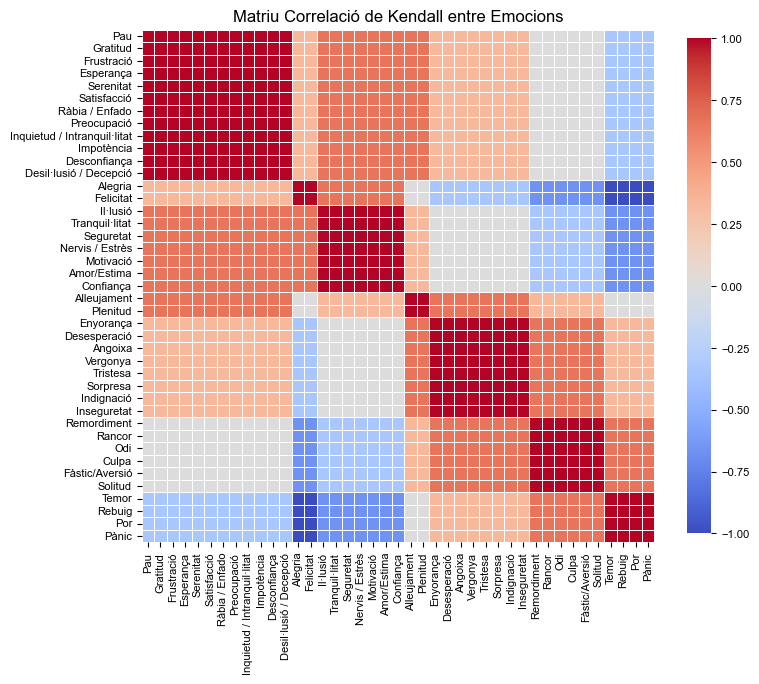

In [24]:
# Crear un mapa de calor para la correlación de Kendall
fig, ax = plt.subplots(figsize=(8.27, 11.69)) # Crear figura con el tamaño de A4 (DINA4)

# Crear un mapa de calor per a la correlació de Kendall
sns.heatmap(sorted_kendall_corr, annot=False, cmap='coolwarm', fmt=".1f", square=True, 
            cbar_kws={"shrink": .55}, linewidths=.5, ax=ax)
ax.set_title('Matriu Correlació de Kendall entre Emocions')
plt.show()

In [25]:
# Si se quiere guardar el gráfico al PC

# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gráficos') 
# Guardar como PDF en tamaño A4
fig.savefig(f'{savePath}/matriu_correlació_kendall_emocions_A4.pdf', format='pdf', bbox_inches='tight')

## 2. Sabries explicar com se senten últimament…?

### **Consciencia del sentir dels altres. Nivells d'empatia**
   **Pregunta:** Quants dels joves tenen consciencia de com se senten les persones amb les que conviuen?<br>
   **Pregunta:** Quin nivell d'empatia assoleixen la majoria dels joves?
   - **Análisis**: 
     - Calcular el percentatde de joves que saben com se senten els altres.
     - Calcular el percentatge de joves a cada nivell d'empatia
     - 
   - **Visualización**: 
     - **Gráfico  apilado** para comparar els percentatges a les diverses categories: familia, amistats, educadors i societat (altres)
     - **Gráfico asdf**

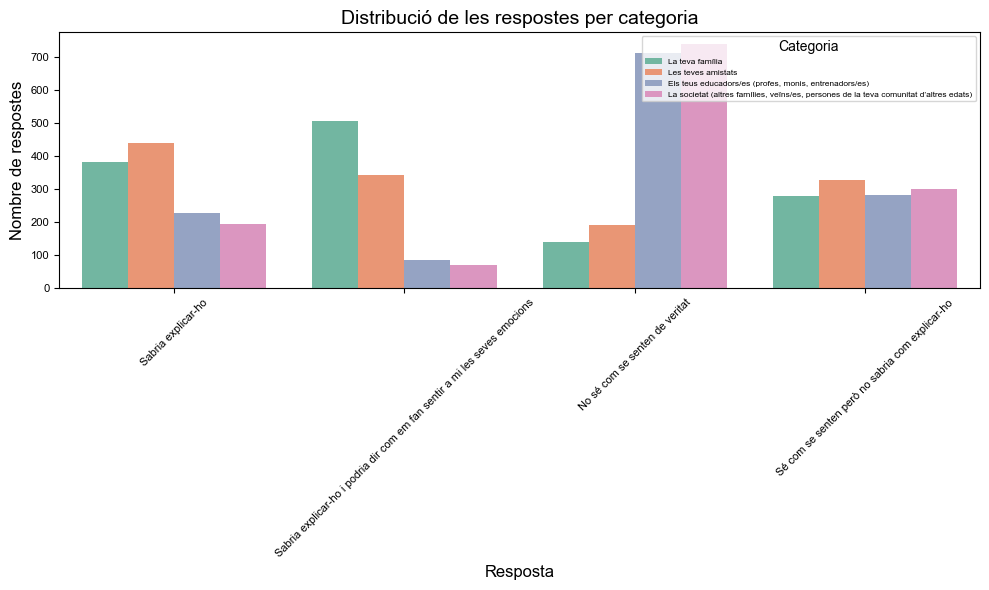

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suposant que tens el teu DataFrame en la variable df
# Exemple de com podria ser el DataFrame (ajusta-ho a la teva estructura real)
data = SEJ_conciencia_sentir_p2.copy()

# Crear el DataFrame
df = pd.DataFrame(data)

# Convertir cada columna en la freqüència de les respostes
df_melted = df.melt(var_name='Categoria', value_name='Resposta')

# Crear el gràfic
plt.figure(figsize=(10, 6))
sns.countplot(x='Resposta', hue='Categoria', data=df_melted, palette='Set2')

# Afegir títol i etiquetes
plt.title('Distribució de les respostes per categoria', fontsize=14)
plt.xlabel('Resposta', fontsize=12)
plt.ylabel('Nombre de respostes', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Categoria', loc='upper right')

# Mostrar el gràfic
plt.tight_layout()
plt.show()


C:\Users\sebas\AppData\Local\Temp\ipykernel_10840\1752479790.py:50: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  fig.tight_layout()


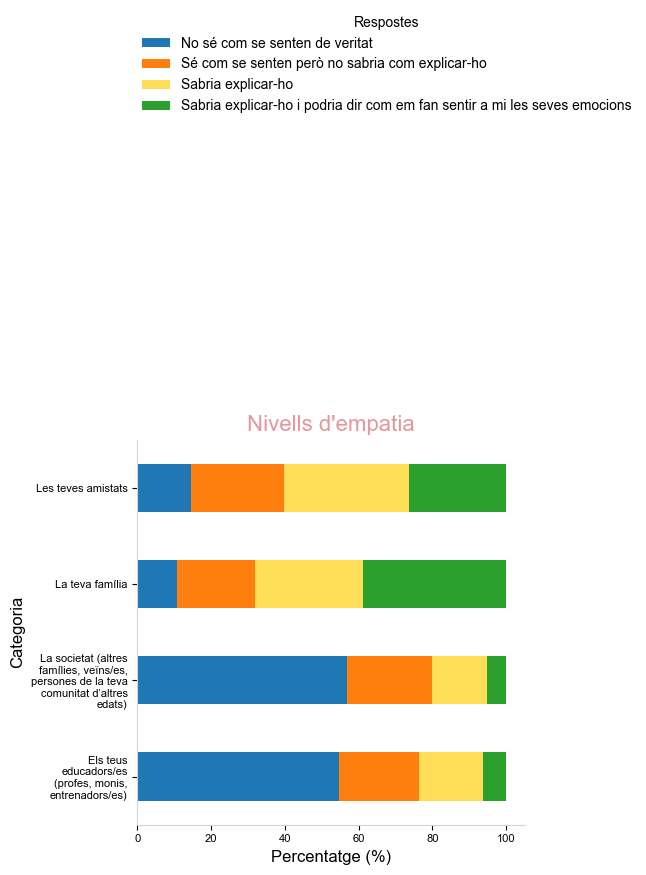

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap  

# Datos
data = SEJ_conciencia_sentir_p2.copy()
df = pd.DataFrame(data)

# Convertir cada columna en la frecuencia de las respuestas
df_melted = df.melt(var_name='Categoria', value_name='Resposta')

# Calcular los porcentajes por cada respuesta dentro de cada categoría
df_percent = df_melted.groupby(['Categoria', 'Resposta']).size().unstack().fillna(0)
df_percent = df_percent.div(df_percent.sum(axis=1), axis=0) * 100  # Convertir a porcentajes

# Reordenar las categorías de las respuestas
respuestas = list(df_percent.columns)  # Obtener la lista de respuestas
ultima_respuesta = respuestas.pop()  # Extraer la última respuesta
respuestas.insert(1, ultima_respuesta)  # Insertarla en la segunda posición
df_percent = df_percent[respuestas]  # Reordenar las columnas del DataFrame

# Definir colores manualmente para representar niveles crecientes de empatía
colores_manual = ["#1f77b4", "#ff7f0e", "#ffdd57", "#2ca02c"]

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(5, 5))  # Tamaño A4 (DINA4) figsize=(8.27, 11.69)

# Crear el gráfico de barras apiladas con los ejes invertidos
df_percent.plot(kind='barh', stacked=True, color=colores_manual, ax=ax)

# Añadir título y etiquetas
ax.set_title("Nivells d'empatia", fontsize=16, color="#E5989B")
ax.set_xlabel('Percentatge (%)', fontsize=12)
ax.set_ylabel('Categoria', fontsize=12)

# Dividir los nombres de las categorías en múltiples líneas si son muy largos
ax.set_yticklabels(['\n'.join(textwrap.wrap(label, 20)) for label in df_percent.index])

# Mejorar la estética del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("#D3D3D3")
ax.spines['bottom'].set_color("#D3D3D3")

# Mover la leyenda a la parte superior izquierda, fuera del gráfico
ax.legend(title="Respostes", bbox_to_anchor=(-0.02, 2.134), loc='upper left', fontsize=10, frameon=False)

# Ajustar el diseño para evitar cortes
fig.tight_layout()
plt.show()


In [82]:
# Si se quiere guardar el gráfico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gráficos') 
# Guardar como PDF en tamaño A4
fig.savefig(f'{savePath}/nivells_de_empatia.pdf', format='pdf', bbox_inches='tight')

## 3. Dona’t un minut per pensar en situacions de malestar a la teva classe. Com vius emocionalment tu, personalment, aquests moments? (marca'n una)

In [43]:
#Mapeja les respostes amb el diccionari
SEJ_conciencia_sentir_p3['categoria_codi_personal'] = SEJ_conciencia_sentir_p3['categoria moment actual personal'].map(transició_emocional_personal_dict).fillna('altres per codificar')

#Calcula la freqüència relativa en percentatge
freq_percentatge_personal = SEJ_conciencia_sentir_p3['categoria_codi_personal'].value_counts(normalize=True) * 100

#Mostra les dades ordenades
freq_percentatge_personal = freq_percentatge_personal.sort_values(ascending=False)

#Mostra les dades amb format més clar (opcional)
print(freq_percentatge_personal.to_frame(name='Percentatge').reset_index().rename(columns={'index': 'Categoria'}))

  categoria_codi_personal  Percentatge
0                 Negació    28.127369
1               Agraïment    19.711903
2              Comprensió    16.830933
3              Resignació    15.769522
4              Acceptació    12.130402
5    altres per codificar     7.429871


## 4. I, per aquestes situacions de malestar a la teva classe, com creus que les viu el grup? (marca'n una)

In [44]:
#Mapeja les respostes amb el diccionari
SEJ_conciencia_sentir_p4['categoria_codi_grupal'] = SEJ_conciencia_sentir_p4['categoria moment actual grup'].map(transició_emocional_grupal_dict).fillna('altres per codificar')

#Calcula la freqüència relativa en percentatge
freq_percentatge_grupal = SEJ_conciencia_sentir_p4['categoria_codi_grupal'].value_counts(normalize=True) * 100

#Mostra les dades ordenades
freq_percentatge_grupal = freq_percentatge_grupal.sort_values(ascending=False)

#Mostra les dades amb format més clar (opcional)
print(freq_percentatge_grupal.to_frame(name='Percentatge').reset_index().rename(columns={'index': 'Categoria'}))

  categoria_codi_grupal  Percentatge
0               Negació    22.289613
1            Acceptació    21.607278
2            Resignació    19.105383
3            Comprensió    15.996967
4  altres per codificar    11.220622
5             Agraïment     9.780136


## Preungtes 3 y 4. Anàlisi comú

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **1. Càlcul dels percentatges per cada categoria**
# Percentatge de cada codi en els personals
percentatges_personals = (
    SEJ_conciencia_sentir_p3['categoria_codi_personal']
    .value_counts(normalize=True)
    .sort_index() * 100
)

# Percentatge de cada codi en els grupals
percentatges_grupals = (
    SEJ_conciencia_sentir_p4['categoria_codi_grupal']
    .value_counts(normalize=True)
    .sort_index() * 100
)

# **2. Crear un DataFrame per comparar els percentatges**
comparacio_df = pd.DataFrame({
    'Percentatge Personal': percentatges_personals,
    'Percentatge Grupal': percentatges_grupals
}).fillna(0)  # Omple amb 0 si alguna categoria no està present en un dels grups

print(comparacio_df)  # Mostra la taula per veure els percentatges



                      Percentatge Personal  Percentatge Grupal
Acceptació                       12.130402           21.607278
Agraïment                        19.711903            9.780136
Comprensió                       16.830933           15.996967
Negació                          28.127369           22.289613
Resignació                       15.769522           19.105383
altres per codificar              7.429871           11.220622


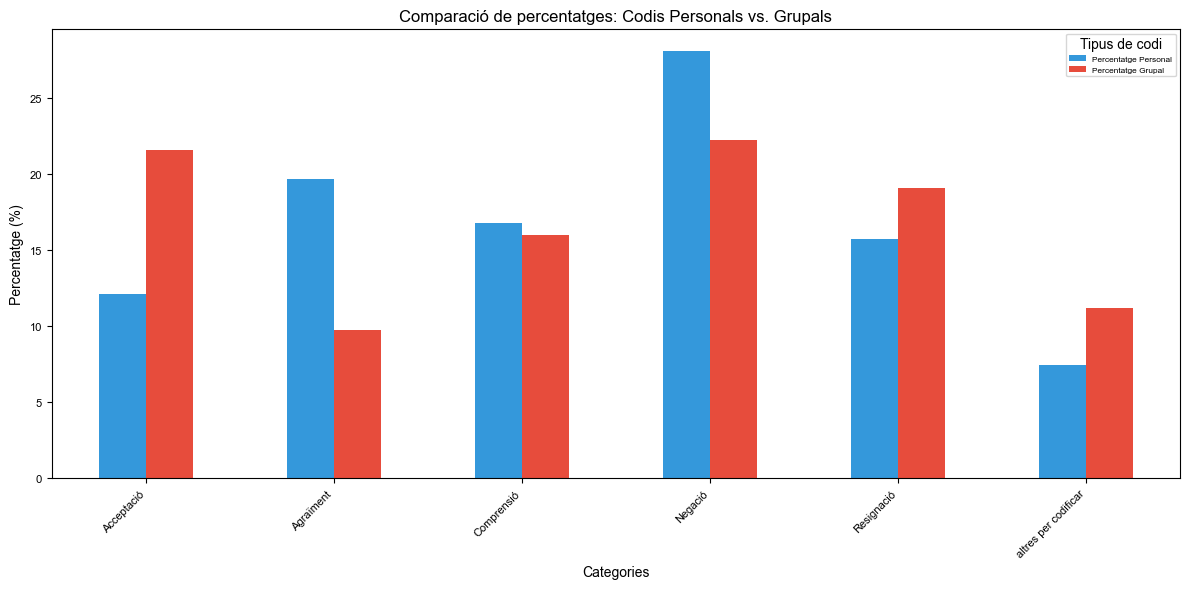

In [46]:
# **3. Visualització 1: Comparació amb un gràfic de barres**
fig1, ax1 = plt.subplots(figsize=(12, 6))
comparacio_df.plot(kind='bar', ax=ax1, color=['#3498db', '#e74c3c'])
ax1.set_title("Comparació de percentatges: Codis Personals vs. Grupals")
ax1.set_ylabel("Percentatge (%)")
ax1.set_xlabel("Categories")
ax1.legend(title="Tipus de codi")
plt.xticks(rotation=45, ha='right')
fig1.tight_layout()
plt.show()

In [48]:
# Si se quiere guardar el gráfico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gráficos') 
# Guardar como PDF en tamaño A4
fig.savefig(f'{savePath}/etapes_de_transició_emocional.pdf', format='pdf', bbox_inches='tight')

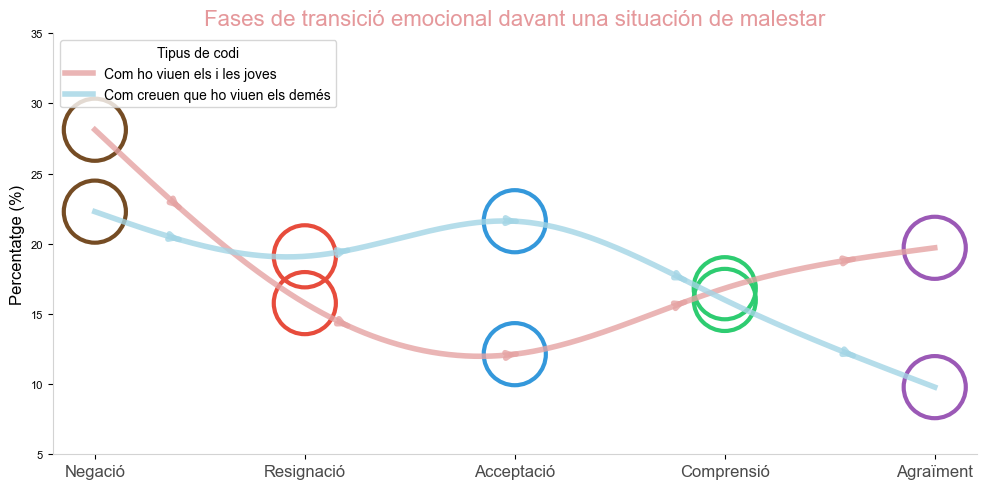

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# **Reordenar el DataFrame** para que siga el orden correcto de transició emocional
comparacio_df = comparacio_df.loc[transició_emocional]  

# Crear la figura
fig, ax = plt.subplots(figsize=(10, 5))

# Crear eje X numérico para la interpolación
x_numeric = np.arange(len(transició_emocional))

# Graficar cada columna con una curva interpolada cúbica
for i, col in enumerate(comparacio_df.columns):
    y_values = comparacio_df[col].values  # Valores de porcentaje
    
    # Crear interpolación cúbica asegurando que pasa por los puntos exactos
    spline = CubicSpline(x_numeric, y_values, bc_type='natural')
    
    # Crear valores suavizados para X y Y
    x_smooth = np.linspace(x_numeric.min(), x_numeric.max(), 300)
    y_smooth = spline(x_smooth)
    
    # Dibujar la línea curva interpolada y asignar un label para la leyenda
    ax.plot(x_smooth, y_smooth, linestyle='-', linewidth=4, alpha=0.8, 
            label=f"{col}", color=['#E5A3A3', '#A3D5E5'][i])

    # Agregar flechas en la curva
    num_flechas = 5  # Número de flechas por curva
    posiciones_flechas = np.linspace(0.1, 0.9, num_flechas)  # Posiciones normalizadas

    for pos in posiciones_flechas:
        idx = int(pos * len(x_smooth))  # Índice del punto donde colocar la flecha
        if idx >= len(x_smooth) - 1:
            continue

        # Calcular dirección de la curva (derivada)
        dx = x_smooth[idx + 1] - x_smooth[idx]
        dy = y_smooth[idx + 1] - y_smooth[idx]
        
        # Dibujar la flecha con un tamaño proporcional
        ax.annotate(
            "", xy=(x_smooth[idx] + dx * 0.3, y_smooth[idx] + dy * 0.3), 
            xytext=(x_smooth[idx], y_smooth[idx]), 
            arrowprops=dict(arrowstyle="->", color=['#E5A3A3', '#A3D5E5'][i], lw=4, alpha=0.8)
        )

# Dibujar los círculos grandes para cada punto con bordes gruesos
for fase, x in zip(transició_emocional, x_numeric):
    ax.scatter(x, comparacio_df.loc[fase, comparacio_df.columns[0]], 
               s=2000, facecolors='none', edgecolors=colors_transició_emocional[fase], linewidth=3)
    
    ax.scatter(x, comparacio_df.loc[fase, comparacio_df.columns[1]], 
               s=2000, facecolors='none', edgecolors=colors_transició_emocional[fase], linewidth=3)

# Personalizar títulos y etiquetas
ax.set_title("Fases de transició emocional davant una situación de malestar", fontsize=16, color="#E5989B")
ax.set_ylabel("Percentatge (%)", fontsize=12)
ax.set_xlabel("")
ax.set_xticks(x_numeric)
ax.set_xticklabels(transició_emocional, fontsize=12, color="#4A4A4A")

# Mejorar la estética del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("#D3D3D3")
ax.spines['bottom'].set_color("#D3D3D3")
#ax.grid(axis='y', linestyle='dashed', alpha=0.5)
ax.set_ylim(5, 35)

# Agregar leyenda y cambiar los títulos de los items
handles, labels = ax.get_legend_handles_labels()
labels[0] = f"Com ho viuen els i les joves"  # Cambiar el título del primer item
labels[1] = f"Com creuen que ho viuen els demés"  # Cambiar el título del segundo item
ax.legend(handles, labels, title="Tipus de codi", loc="upper left", fontsize=10)

# Ajustar el diseño
fig.tight_layout()
plt.show()


In [55]:
# Si se quiere guardar el gráfico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gráficos') 
# Guardar como PDF en tamaño A4
fig.savefig(f'{savePath}/fases_de_transició_emocional.pdf', format='pdf', bbox_inches='tight')


### 2. **Comparación entre el estado emocional actual y deseado**
   **Pregunta:** ¿Cómo difiere el estado emocional deseado del actual?
   - **Análisis**: 
     - Comparar las emociones actuales con aquellas que los jóvenes consideran deseadas, identificando las principales diferencias entre ambos estados.
   - **Visualización**: 
     - **Gráfico de barras agrupadas** donde una barra representa la emoción actual y la otra la emoción deseada para cada tipo de sentimiento.

# Análisis Elección personal

## 5. Últimament, quan vull donar resposta a una situació complexa emocionalment (complicada, que remou, que és o pot ser difícil de gestionar, etc.), jo...

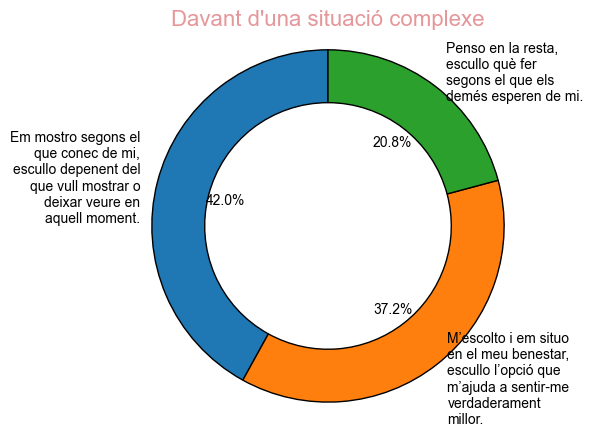

In [113]:
# Calcular los porcentajes de cada categoria
porcentatges = SEJ_eleccio_personal_p5['categoria situació complexe'].value_counts(normalize=True) * 100

# Filtrar las categorías con un porcentaje menor al 1%
porcentatges_filtrades = porcentatges[porcentatges >= 1]

# Crear el gráfico de quesito con un manejador (handle) de la figura
fig, ax = plt.subplots(figsize=(5, 5))

# Dividir los nombres de las categorías en 3-4 líneas
labels_wrapped = ['\n'.join(textwrap.wrap(label, width=20)) for label in porcentatges_filtrades.index]

# Crear el gráfico de pie con espacio entre los trozos

ax.pie(porcentatges_filtrades, 
       labels=labels_wrapped,  
       autopct=lambda p: f'{p:.1f}%',  # Formato de porcentaje
       startangle=90, 
       wedgeprops={'width': 0.3, 'edgecolor': 'black'},  
       textprops={'color': 'k', 'fontsize': 10})  # Texto en blanco dentro del pie

ax.set_title("Davant d'una situació complexe", fontsize=16, color="#E5989B")
ax.axis('equal')  # Assegura que el gràfic sigui un cercle

# Mostrar el gráfico
plt.show()


In [114]:
# Si se quiere guardar el gráfico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gráficos') 
# Guardar como PDF en tamaño A4
fig.savefig(f'{savePath}/situacions_complexes.pdf', format='pdf', bbox_inches='tight')

## 6. Últimament, quan sento estrès, por, tristesa, ràbia o alguna altra emoció desagradable, jo...

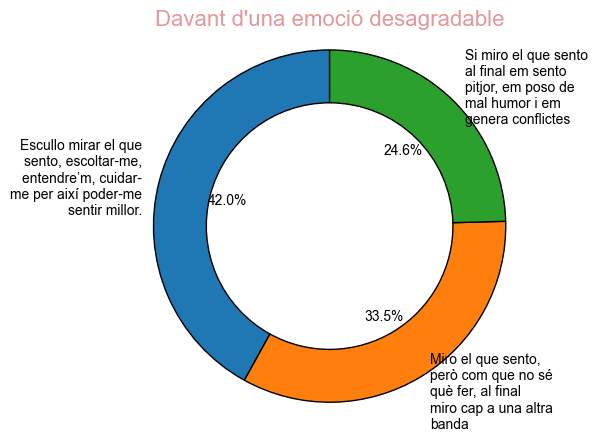

In [116]:
# Calcular los porcentajes de cada categoria
porcentatges = SEJ_eleccio_personal_p6['categria emoció desagradable'].value_counts(normalize=True) * 100

# Filtrar las categorías con un porcentaje menor al 1%
porcentatges_filtrades = porcentatges[porcentatges >= 1]

# Crear el gráfico de quesito con un manejador (handle) de la figura
fig, ax = plt.subplots(figsize=(5, 5))

# Dividir los nombres de las categorías en 3-4 líneas
labels_wrapped = ['\n'.join(textwrap.wrap(label, width=20)) for label in porcentatges_filtrades.index]

# Crear el gráfico de pie con espacio entre los trozos

ax.pie(porcentatges_filtrades, 
       labels=labels_wrapped,  
       autopct=lambda p: f'{p:.1f}%',  # Formato de porcentaje
       startangle=90, 
       wedgeprops={'width': 0.3, 'edgecolor': 'black'},  
       textprops={'color': 'k', 'fontsize': 10})  # Texto en blanco dentro del pie

ax.set_title("Davant d'una emoció desagradable", fontsize=16, color="#E5989B")
ax.axis('equal')  # Assegura que el gràfic sigui un cercle

# Mostrar el gráfico
plt.show()

In [117]:
# Si se quiere guardar el gráfico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gráficos') 
# Guardar como PDF en tamaño A4
fig.savefig(f'{savePath}/emocions_desagradables.pdf', format='pdf', bbox_inches='tight')

# Análisis Responsabilidad individual

## 7. Davant de les diferents emocions que apareixen en situacions complicades, quins comportaments tens? Què fas? (marca totes les que facis)

In [138]:
SEJ_resp_individual_p7

,categoria comportaments
1,Faig com si res i m'evadeixo de les meves emoc...
2,Em pressiono tractant de resoldre tot el que p...
3,Faig com si res i m'evadeixo de les meves emoc...
4,"Em bloquejo. Em costa respondre., Faig com si ..."
5,"Em bloquejo. Em costa respondre., M’ho guardo,..."
...,...
1314,Em pressiono tractant de resoldre tot el que p...
1315,Em pressiono tractant de resoldre tot el que p...
1316,"Em bloquejo. Em costa respondre., Perdo el con..."
1317,"M’ho guardo, prefereixo no expressar com estic..."


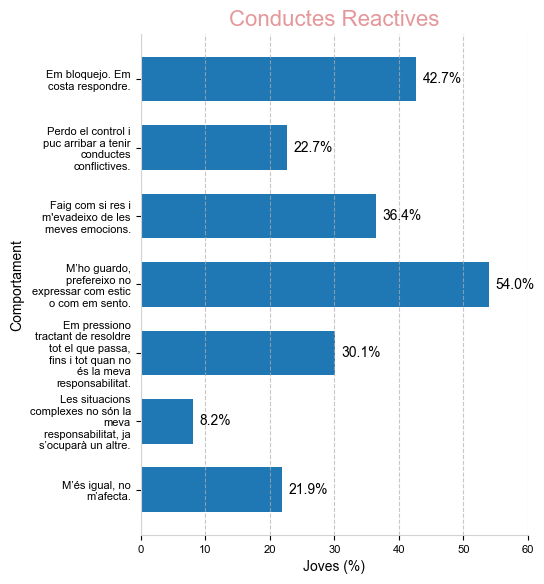

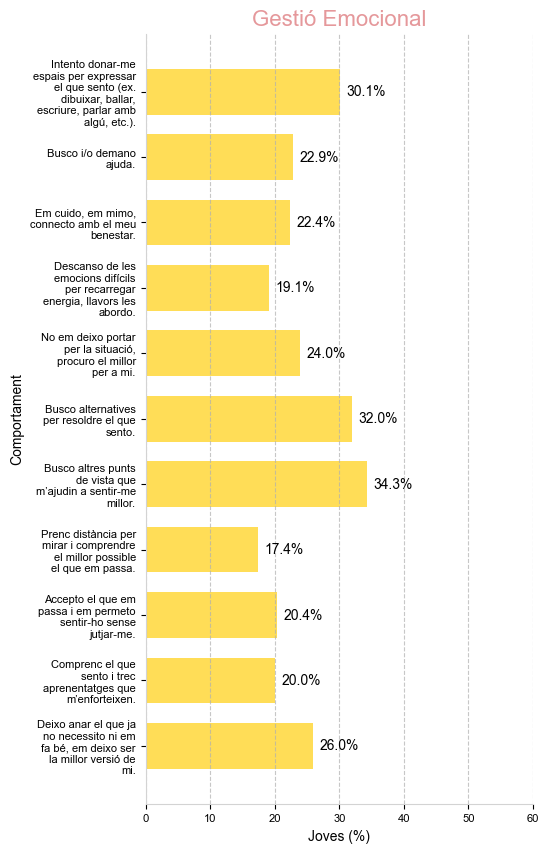

In [146]:
import textwrap

# Paso 1: Separar las frases correctamente
SEJ_resp_individual_p7['comportaments'] = SEJ_resp_individual_p7['categoria comportaments'].apply(
    lambda x: re.split(r'(?<=\.)\, ', x)
)

# Paso 2: Explorar las frases en filas separadas
SEJ_resp_individual_p7_1 = SEJ_resp_individual_p7.explode('comportaments').copy()

# Paso 3: Eliminar duplicados (para que cada persona cuente solo una vez por comportamiento)
#SEJ_resp_individual_p7_1 = SEJ_resp_individual_p7_1.drop_duplicates()

# Paso 4: Contar cuántas personas han seleccionado cada comportamiento
categoria_counts = SEJ_resp_individual_p7_1['comportaments'].value_counts()

# Paso 5: Convertir a porcentaje del total de personas
categoria_percent = (categoria_counts / len(SEJ_resp_individual_p7)) * 100

# Paso 6: Filtrar y ordenar según listas definidas
conductes_reactives_dict = {c: categoria_percent.get(c, 0) for c in conductes_reactives}
gestio_emocional_dict = {c: categoria_percent.get(c, 0) for c in gestio_emocional}

# Función para dividir el texto en líneas
def wrap_text(text, width=20):
    return textwrap.fill(text, width=width)

# Paso 7: Graficar Conductes Reactives
fig1, ax1 = plt.subplots(figsize=(5, 6.5))  # Aumentar el tamaño para evitar solapamientos
# Dividir las categorías del eje Y en varias líneas
wrapped_categories_conductes = [wrap_text(cat) for cat in list(conductes_reactives_dict.keys())]
bars1 = ax1.barh(wrapped_categories_conductes, list(conductes_reactives_dict.values()), color="#1f77b4", height=0.65)  # Aumentar el espacio entre las barras
ax1.set_xlabel("Joves (%)")
ax1.set_ylabel("Comportament")
ax1.set_title("Conductes Reactives", fontsize=16, color="#E5989B")
ax1.grid(axis='x', linestyle='--', alpha=0.7)

# Añadir texto con los porcentajes
for bar in bars1:
    width = bar.get_width()
    ax1.text(width + 1, bar.get_y() + bar.get_height()/2, f"{width:.1f}%", va='center')

# Mejorar la estética del gráfico
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_color("#D3D3D3")
ax1.spines['bottom'].set_color("#D3D3D3")
ax1.set_xlim(0, 60)

# Paso 8: Graficar Gestió Emocional
fig2, ax2 = plt.subplots(figsize=(5, 10))  # Aumentar el tamaño para evitar solapamientos
# Dividir las categorías del eje Y en varias líneas
wrapped_categories_gestio = [wrap_text(cat) for cat in list(gestio_emocional_dict.keys())]
bars2 = ax2.barh(wrapped_categories_gestio, list(gestio_emocional_dict.values()), color="#ffdd57", height=0.7)  # Aumentar el espacio entre las barras
ax2.set_xlabel("Joves (%)")
ax2.set_ylabel("Comportament")
ax2.set_title("Gestió Emocional", fontsize=16, color="#E5989B")
ax2.grid(axis='x', linestyle='--', alpha=0.7)

# Añadir texto con los porcentajes
for bar in bars2:
    width = bar.get_width()
    ax2.text(width + 1, bar.get_y() + bar.get_height()/2, f"{width:.1f}%", va='center')

# Mejorar la estética del gráfico
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_color("#D3D3D3")
ax2.spines['bottom'].set_color("#D3D3D3")
ax2.set_xlim(0, 60)

# Mostrar gráficos
plt.show()




In [147]:
# Si se quiere guardar el gráfico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gráficos') 
# Guardar como PDF en tamaño A4
fig1.savefig(f'{savePath}/conductes_reactives.pdf', format='pdf', bbox_inches='tight')

# Si se quiere guardar el gráfico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gráficos') 
# Guardar como PDF en tamaño A4
fig2.savefig(f'{savePath}/gestio_emocional.pdf', format='pdf', bbox_inches='tight')

## 8. Si sents o sentissis angoixa, disgust o tristesa profunda, a qui recorres? (marca totes les que creguis que tenen a veure amb el que fas)

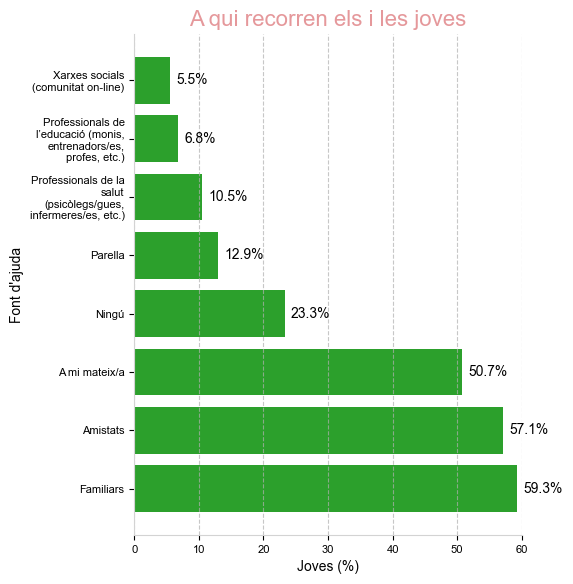

In [151]:
import textwrap

# Paso 1: Separar las frases correctamente
SEJ_resp_individual_p8['suport'] = SEJ_resp_individual_p8['categoria suport'].apply(
    lambda x: re.split(r',\s(?=[A-Z])', x)
)

# Paso 2: Explorar las frases en filas separadas
SEJ_resp_individual_p8_1 = SEJ_resp_individual_p8.explode('suport').copy()

# Paso 3: Eliminar duplicados (para que cada persona cuente solo una vez por comportamiento)
#SEJ_resp_individual_p8_1 = SEJ_resp_individual_p8_1.drop_duplicates()

# Paso 4: Contar cuántas personas han seleccionado cada comportamiento
categoria_counts = SEJ_resp_individual_p8_1['suport'].value_counts()

# Paso 5: Convertir a porcentaje del total de personas
categoria_percent = (categoria_counts / len(SEJ_resp_individual_p8)) * 100

# Filtrar categorías con más del 1%
categoria_percent = categoria_percent[categoria_percent > 1]

# Función para dividir el texto en líneas
def wrap_text(text, width=20):
    return textwrap.fill(text, width=width)

# Paso 6: Graficar
fig, ax = plt.subplots(figsize=(5, 6.5))  # Aumentar el tamaño para evitar solapamientos
# Dividir las categorías del eje Y en varias líneas
wrapped_categories = [wrap_text(cat) for cat in list(categoria_percent.index)]
bars = ax.barh(wrapped_categories, list(categoria_percent.values), color="#2ca02c", height=0.8)  # Aumentar el espacio entre las barras
ax.set_xlabel("Joves (%)")
ax.set_ylabel("Font d'ajuda")
ax.set_title("A qui recorren els i les joves", fontsize=16, color="#E5989B")
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Añadir texto con los porcentajes
for bar in bars:
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height()/2, f"{width:.1f}%", va='center')

# Mejorar la estética del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("#D3D3D3")
ax.spines['bottom'].set_color("#D3D3D3")
ax.set_xlim(0, 60)

# Mostrar gráfico
plt.show()


In [153]:
# Si se quiere guardar el gráfico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gráficos') 
# Guardar como PDF en tamaño A4
fig.savefig(f'{savePath}/font_ajuda.pdf', format='pdf', bbox_inches='tight')

# Análisis Entorno

## 9. Pensa en les relacions que has tingut últimament (amb les teves amistats, família, comunitat escolar, etc.). Quan ha sigut l’última vegada que has sentit que algú et preguntava de veritat, amb ànim de saber la teva resposta, com et sents?

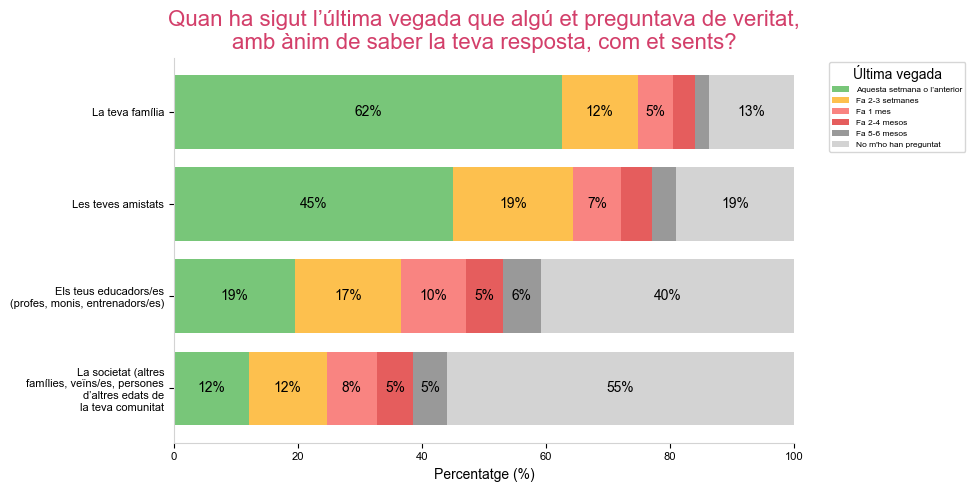

In [135]:
import matplotlib.pyplot as plt
import pandas as pd

# Reordenar les categories en l'ordre correcte
categories_ordre = [
    "Aquesta setmana o l’anterior",
    "Fa 2-3 setmanes",
    "Fa 1 mes",
    "Fa 2-4 mesos",
    "Fa 5-6 mesos",
    "No m'ho han preguntat"
]

# Comptar la freqüència de cada categoria per a cada grup (família, amistats, educadors, societat)
freq_per_grup = SEJ_entorn_p9.apply(lambda col: col.value_counts(normalize=True) * 100).fillna(0)

# Reordenar les files segons l'ordre de les categories
freq_per_grup = freq_per_grup.loc[categories_ordre]

# Definir colors per a cada categoria (basats en la imatge de referència)
colors = {
    "Aquesta setmana o l’anterior": "#78C679",
    "Fa 2-3 setmanes": "#FDC04E",
    "Fa 1 mes": "#F98481",
    "Fa 2-4 mesos": "#E55D5D",
    "Fa 5-6 mesos": "#999999",
    "No m'ho han preguntat": "#D3D3D3"
}

# Crear el gràfic de barres apilades
fig, ax = plt.subplots(figsize=(8, 5))

# Apilar les barres per cada categoria
bottom_values = None  # Per començar des de 0
for categoria in categories_ordre:
    values = freq_per_grup.loc[categoria]
    ax.barh(freq_per_grup.columns, values, color=colors[categoria], label=categoria, left=bottom_values)
    
    # Acumular valors per a la següent categoria
    bottom_values = values if bottom_values is None else bottom_values + values

# Afegir percentatges dins de cada barra
for idx, col in enumerate(freq_per_grup.columns):
    cumulative = 0
    for categoria in categories_ordre:
        value = freq_per_grup.loc[categoria, col]
        if value > 5:  # Només mostrar etiquetes si el valor és significatiu
            ax.text(cumulative + value / 2, idx, f"{int(value)}%", ha="center", va="center", fontsize=10, color="black")
        cumulative += value

# Estil del gràfic
ax.set_xlabel("Percentatge (%)")
ax.set_xlim(0, 100)
ax.set_xticks(range(0, 101, 20))

# Modificar el títol per posar-lo en dues línies
ax.set_title("Quan ha sigut l’última vegada que algú et preguntava de veritat,\namb ànim de saber la teva resposta, com et sents?", fontsize=16, color="#D33F6A")

# Millorar la estètica del gràfic
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("#D3D3D3")
ax.spines['bottom'].set_color("#D3D3D3")

# Llegenda
ax.legend(title="Última vegada", bbox_to_anchor=(1.05, 1), loc="upper left")

# Invertir l'ordre de les categories per coincidir amb la imatge
ax.invert_yaxis()

# Funció per formatar les etiquetes de l'eix Y
def format_labels(label):
    label_text = label.get_text()  # Obtenir el text de l'etiqueta
    words = label_text.split()
    if len(words) > 3:
        # Divideix en línies de 3 paraules
        return '\n'.join([' '.join(words[i:i+3]) for i in range(0, len(words), 3)])
    return label_text

# Obtenir les ubicacions de les etiquetes (ticks) de l'eix Y
yticks = ax.get_yticks()

# Actualitzar les etiquetes de l'eix Y
ax.set_yticks(yticks)  # Assegurem-nos que els ticks siguin els mateixos
ax.set_yticklabels([format_labels(label) for label in ax.get_yticklabels()])

# Mostrar gràfic
plt.show()



In [136]:
# Si se quiere guardar el gráfico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gráficos') 
# Guardar como PDF en tamaño A4
fig.savefig(f'{savePath}/entorn_com_et_sents.pdf', format='pdf', bbox_inches='tight')

## 10. Últimament, com estàs vivint emocionalment les següents situacions?

In [167]:
#Barras apiladas horizontales con porcentajes, eje x en orden concreto
# Dividir plots segun:
## Situaciones de Desarrollo Personal
## Situaciones del Ámbito Relacional
## Situaciones del Sentido de la vida y participación ciudadana
## Situaciones de riesgo psicosocial
## Situaciones de violencia o maltrato

# Categorias Percepción de Bienestar

ambit_relacional = ['Les relacions familiars', 'Les relacions amb amistats',
                    'Les relacions afectives (parella)',
                    'Les relacions amb educadores/as (profes, monis, entrenadors/es)',
                    'Les relacions amb la comunitat (persones del meu municipi)',
                    'Les relacions digitals (followers, contactes, etc.)']
desenvolupament_personal = ['La meva personalitat','El meu lleure, la diversió i el joc', 
                            'La meva autoestima','La meva afectivitat i sexualitat']
sentit_vida_participacio_ciutadana = ['Exercir llibertats i drets', 'La meva educació i futur acadèmic']
situacions_risc_psicosocial = ['El consum de substàncies',
                               'El consum de pantalles (temps connectat/da, actiu/va, etc.)',
                               'Les meves pèrdues o dols','L’afrontament de malalties', 'La meva situació socioeconòmica']
situacions_violencia_o_maltractaments = ['Situacions de bullying o ciberbullying',
                                         'Situacions de discriminació i demostracions d’odi',
                                         'Situacions de violències de gènere i/o de control en la parella']



SEJ_entorn_p10

,Les relacions familiars,Les relacions amb amistats,Les relacions afectives (parella),"Les relacions amb educadores/as (profes, monis, entrenadors/es)",Les relacions amb la comunitat (persones del meu municipi),"Les relacions digitals (followers, contactes, etc.)",El consum de substàncies,"El consum de pantalles (temps connectat/da, actiu/va, etc.)",Les meves pèrdues o dols,La meva personalitat,L’afrontament de malalties,La meva situació socioeconòmica,Exercir llibertats i drets,La meva educació i futur acadèmic,"El meu lleure, la diversió i el joc",La meva autoestima,La meva afectivitat i sexualitat,Situacions de bullying o ciberbullying,Situacions de discriminació i demostracions d’odi,Situacions de violències de gènere i/o de control en la parella
0,Em sento bé,Em sento bé,Em sento bé,No ho he viscut,Em sento bé,Em sento bé,Em sento bé,No sé com em sento,Em sento bé,Em sento bé,Em sento bé,Em sento malament,Em sento bé,Em sento bé,Em sento bé,Em sento bé,Em sento bé,No ho he viscut,No ho he viscut,No ho he viscut
1,Em sento bé,Em sento bé,No ho he viscut,Em sento bé,Em sento malament,Em sento bé,No ho he viscut,Em sento bé,Em sento bé,Em sento bé,Em sento bé,No sé com em sento,Em sento bé,Em sento bé,Em sento bé,Em sento bé,No sé com em sento,No ho he viscut,No ho he viscut,No ho he viscut
2,Em sento bé,Em sento malament,No ho he viscut,No sé com em sento,No sé com em sento,No sé com em sento,Em sento bé,Em sento bé,No sé com em sento,Em sento bé,No sé com em sento,No sé com em sento,Em sento bé,No sé com em sento,No sé com em sento,Em sento malament,Em sento bé,Em sento bé,Em sento bé,Em sento bé
3,Em sento bé,Em sento bé,Em sento bé,No sé com em sento,No sé com em sento,No ho he viscut,Em sento bé,Em sento bé,No ho he viscut,Em sento bé,No ho he viscut,Em sento bé,No sé com em sento,Em sento bé,Em sento bé,Em sento bé,Em sento bé,No ho he viscut,No ho he viscut,No ho he viscut
4,Em sento bé,Em sento bé,No sé com em sento,No sé com em sento,Em sento bé,Em sento bé,No ho he viscut,Em sento malament,Em sento malament,No sé com em sento,No sé com em sento,Em sento bé,Em sento bé,Em sento malament,Em sento bé,Em sento malament,No ho he viscut,No ho he viscut,No ho he viscut,No ho he viscut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,Em sento bé,Em sento bé,No ho he viscut,No sé com em sento,No sé com em sento,No ho he viscut,No ho he viscut,No sé com em sento,No ho he viscut,Em sento bé,No ho he viscut,No ho he viscut,Em sento bé,Em sento bé,Em sento bé,Em sento bé,Em sento bé,No ho he viscut,No ho he viscut,No ho he viscut
1315,Em sento bé,Em sento bé,No ho he viscut,Em sento bé,Em sento bé,No ho he viscut,No ho he viscut,Em sento bé,No ho he viscut,Em sento bé,No ho he viscut,Em sento bé,Em sento bé,Em sento bé,Em sento bé,Em sento bé,No ho he viscut,No ho he viscut,No ho he viscut,No ho he viscut
1316,No ho he viscut,No ho he viscut,No ho he viscut,No ho he viscut,No ho he viscut,No ho he viscut,No ho he viscut,No ho he viscut,No ho he viscut,No ho he viscut,No ho he viscut,No ho he viscut,No ho he viscut,No ho he viscut,No ho he viscut,No ho he viscut,No ho he viscut,No ho he viscut,No ho he viscut,No ho he viscut
1317,Em sento bé,Em sento bé,No ho he viscut,Em sento bé,Em sento bé,No ho he viscut,No ho he viscut,Em sento bé,Em sento bé,Em sento bé,No ho he viscut,No ho he viscut,No ho he viscut,Em sento bé,Em sento bé,Em sento bé,No ho he viscut,No ho he viscut,No ho he viscut,No ho he viscut


# Análisis demográfico

Basado en los datos del dataframe **SEJ_demografics**, que incluye información sobre la Edat, Ocupación, Distribució Territorial, Sexe biològic, Gènere y las personas con las que viven, se pueden realizar diversos análisis y gráficos interesantes. 

In [127]:
import pandas as pd

# Seleccionar només les columnes d'interès
columns_of_interest = ['Distribució Territorial', 'Edat', 'Gènere', 'Ocupació', 'Sexe biològic']

# Subconjunt del DataFrame només amb les columnes seleccionades
SEJ_demografics = SEJ_demografics[columns_of_interest].copy()

In [132]:
# Convertir totes les columnes a tipus de dades de categoria
SEJ_demografics= SEJ_demografics.apply(lambda x: x.astype('category'))
print(f"Nombre final de participants: {len(SEJ_demografics)}")
print("\n")

# Crear una tabla individual para cada columna
taulas_percentatges = {columna: round(SEJ_demografics[columna].value_counts(normalize=True) * 100,2) for columna in SEJ_demografics.columns}

# Mostrar las tablas individuales
for columna, taula in taulas_percentatges.items():
    #print(f"Percentajes para la columna '{columna}':")
    display(taula)
    print("\n")

Nombre final de participants: 1197




Distribució Territorial
Vilanova i la Geltrú    51.04
Cubelles                31.24
Sant Pere de Ribes       9.11
Canyelles                7.77
Sitges                   0.67
Olivella                 0.17
Name: proportion, dtype: float64

Edat
15.0    27.74
14.0    24.23
13.0    19.21
12.0    14.54
16.0     9.11
17.0     3.26
18.0     1.25
19.0     0.67
Name: proportion, dtype: float64

Gènere
Home         51.80
Dona         47.03
No ho sé      1.00
No binari     0.17
Name: proportion, dtype: float64

Ocupació
4t d'ESO                  31.24
3r d'ESO                  24.98
2n d'ESO                  19.05
1r d'ESO                  12.95
Formació professional      4.93
1r Batx.                   4.68
2n Batx.                   1.75
Formació universitària     0.33
No estudio                 0.08
Name: proportion, dtype: float64

Sexe biològic
Mascle         51.63
Femella        48.20
Intersexual     0.17
Name: proportion, dtype: float64

## Figuras individuales

### Distribución de edades

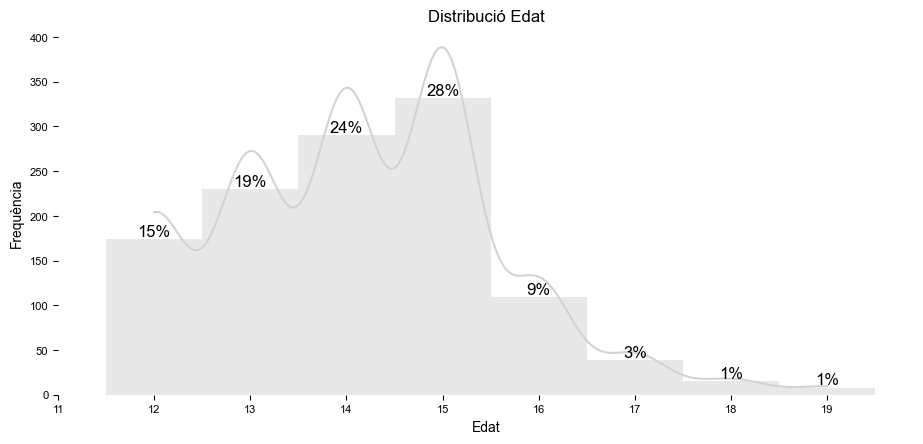

In [129]:
# Gráfico 1: Distribución de edades
# Crear figura y subplots con el tamaño de A4 (DINA4)
fig, axs = plt.subplots(figsize=(10, 5))  # 5 filas, 2 columnas (10 gráficos) figsize=(8.27, 11.69)
fig.tight_layout(pad=4.0)  # Ajustar espacio entre subplots

# Gráfico 1: Distribución de la Edat
histplot = sns.histplot(SEJ_demografics['Edat'], kde=True, binwidth=1, ax=axs,color= 'lightgray', edgecolor=None)
axs.set_title('Distribució Edat')
axs.set_xlabel('Edat')
axs.set_ylabel('Frequència')


# Obtener los datos de la gráfica
counts = [patch.get_height() for patch in histplot.patches]
bin_edges = [patch.get_x() for patch in histplot.patches] + [patch.get_x() + patch.get_width() for patch in histplot.patches]

# Calcular el total de conteo
total_count = sum(counts)

# Añadir porcentaje sobre cada bin
for count, bin_edge in zip(counts, bin_edges[:-1]):  # Exclude last edge as it's not a bin
    if count > 0:  # Solo anotar si hay conteo
        percentage = (count / total_count) * 100
        axs.text(bin_edge + 0.5, count, f'{percentage:.0f}%', ha='center', va='bottom',fontsize=12,fontfamily='Arial')

# Ajustar los ticks del eje x para que sean números enteros
axs.set_xticks(range(int(min(bin_edges)), int(max(bin_edges)) + 1))  # Establecer los ticks en números enteros
        
axs.set_frame_on(False)     


### Distribución de territorios

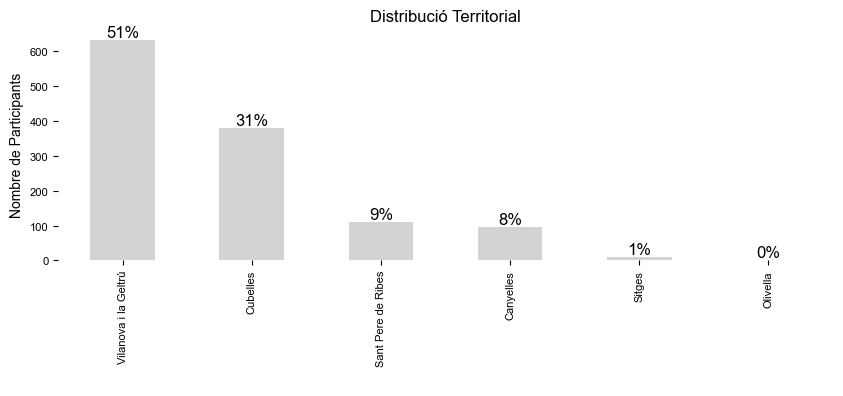

In [71]:
# Gráfico 2: Distribución Territorial
fig, axs = plt.subplots(figsize=(10, 3))  # 5 filas, 2 columnas (10 gráficos) figsize=(8.27, 11.69)
# Cambiar el fondo a negro para la figura y los ejes
#fig.patch.set_facecolor('black')
#axs.set_facecolor('black')

counts = SEJ_demografics['Distribució Territorial'].value_counts()
bar_plot = counts.plot(kind='bar', ax=axs, color= 'lightgray')
axs.set_title('Distribució Territorial')
axs.set_xlabel('Territori', color='white')
axs.set_ylabel('Nombre de Participants')
axs.tick_params(axis='x', rotation=90)
# Calcular el total de participantes
total_count = counts.sum()
# Añadir porcentaje sobre cada barra
for index, value in enumerate(counts):
    percentage = (value / total_count) * 100
    axs.text(
        index, 
        value, 
        f'{percentage:.0f}%', 
        ha='center', 
        va='bottom',
        fontsize=12,  # Tamaño del texto
        fontfamily='Arial' # Tipo de letra
    )
    
axs.set_frame_on(False)  

### Representatividad muestral

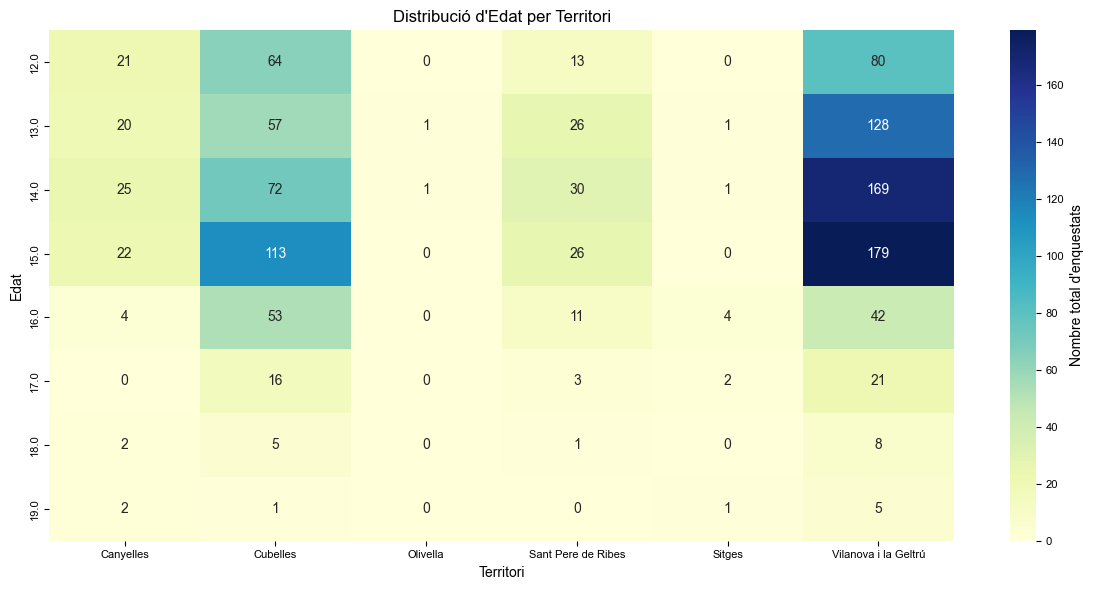

In [72]:
# Tabla para visuializar en que grupos hay más o menos datos
age_territory_distribution = SEJ_demografics.groupby(['Edat', 'Distribució Territorial']).size().unstack(fill_value=0)

# Heatmap de la tabla
plt.figure(figsize=(12, 6))
sns.heatmap(age_territory_distribution, annot=True, cmap="YlGnBu", fmt="d", cbar_kws={'label': "Nombre total d'enquestats"})
plt.title('Distribució d\'Edat per Territori')
plt.xlabel('Territori')
plt.ylabel('Edat')
plt.tight_layout()
plt.show()


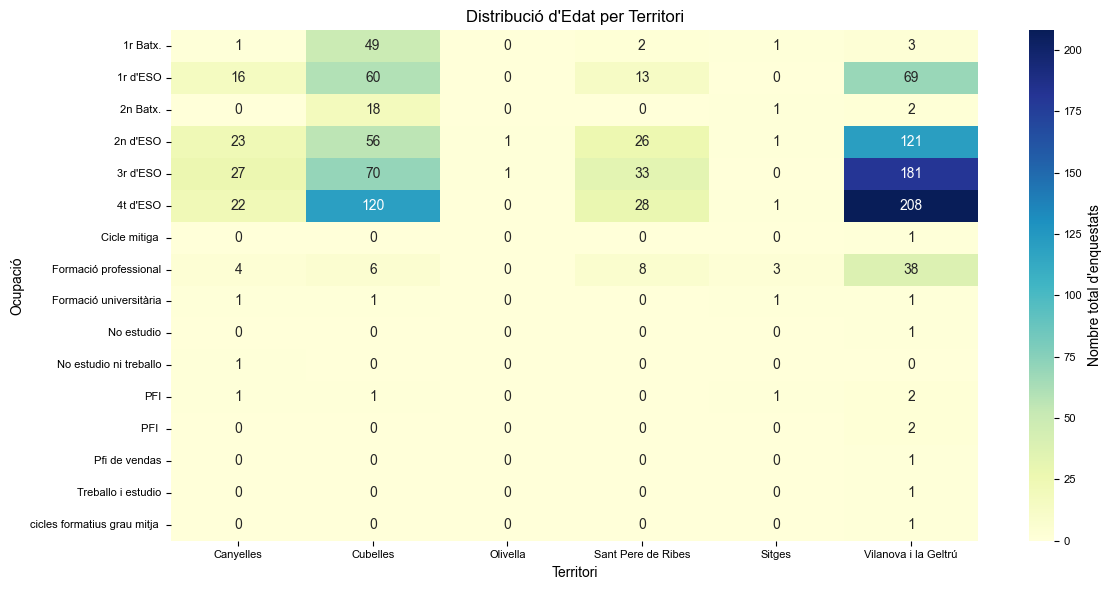

In [73]:
# Tabla para visuializar en que grupos hay más o menos datos
age_territory_distribution = SEJ_demografics.groupby(['Ocupació', 'Distribució Territorial']).size().unstack(fill_value=0)

# Heatmap de la tabla
plt.figure(figsize=(12, 6))
sns.heatmap(age_territory_distribution, annot=True, cmap="YlGnBu", fmt="d", cbar_kws={'label': "Nombre total d'enquestats"})
plt.title('Distribució d\'Edat per Territori')
plt.xlabel('Territori')
plt.ylabel('Ocupació')
plt.tight_layout()
plt.show()


In [13]:
# Cargando y filtrando datos poblacionales segun edades de interés (datos Idescat)
population_df = pd.read_excel(f'{filePopulation}.xlsx', sheet_name='Datos', skiprows=[0], index_col=[0,1]) # segunda hoja llmada Datos, no leer la primera fila
population_df.index.names = ["Edat", "Territori"]

# Entre "11 años" y "18 años"
age_range = [f"{i} años" for i in range(11, 19)]
filtered_population_df = population_df.loc[age_range]
# Suma de "Total" por categoria
territori_absolut_dict = filtered_population_df["Total"].groupby("Territori").sum().to_dict()

## A partir de la información del Idescat
# Calcular el total de mostres
total_mostres = sum(territori_absolut_dict.values())
# Crear un nou diccionari amb les proporcions
territori_proporcio_dict = {territori: (count / total_mostres) * 100 for territori, count in territori_absolut_dict.items()}

In [74]:
# Contamos la muestra actuual por territorio
mostra_actual = SEJ_demografics['Distribució Territorial'].value_counts()

#Creamos una tabla con la muestra actual, esperada y faltante
taula_mostra = pd.DataFrame(columns=['Mostra Actual', 'Mostra Esperada', 'Mostra Faltant'])

# Iteramos por cada territorio
for territori, poblacio in territori_absolut_dict.items():
    mostra_esperada = int(poblacio * sample_goal)  # sample_goal = % de la població a cubrir
    mostra_actual_territori = mostra_actual.get(territori, 0)  # Mostra actual per territori
    mostra_faltant = mostra_esperada - mostra_actual_territori  # Mostra faltant per arribar al 25%
    
    # Anyadimos fila
    taula_mostra.loc[territori] = [mostra_actual_territori, mostra_esperada, mostra_faltant]

# Mostramos la tabla
taula_mostra

,Mostra Actual,Mostra Esperada,Mostra Faltant
Canyelles,96,51,-45
Cubelles,381,166,-215
Olivella,2,47,45
Sant Pere de Ribes,110,311,201
Sitges,9,267,258
Vilanova i la Geltrú,632,607,-25


In [75]:
# Contamos la muestra actual por edad, para cada territorio
# Creamos un diccionario para guardar los DataFrames separados por territorio
resultados_territorios = {}

# Lista de todas las edades posibles (de 12 a 19)
edats_possibles = list(range(12, 20))

# Iteramos sobre cada territorio
for territori, poblacio in territori_absolut_dict.items():
    # Calculamos el 25% de la población de cada territorio y redondeamos al alza
    mostra_esperada = int(np.ceil(poblacio *  sample_goal))  # sample_goal = % de la població a cubrir
    
    # Filtramos los datos del territorio actual
    mostra_actual_territori = SEJ_demografics[SEJ_demografics['Distribució Territorial'] == territori]
    
    # Contamos cuántos individuos hay por cada grupo de edad en el territorio
    mostra_actual_edad = mostra_actual_territori['Edat'].value_counts().sort_index()
    
    # Calculamos la muestra esperada por edad considerando todas las edades de 12 a 19
    mostra_esperada_edad = mostra_esperada / len(edats_possibles)  # Dividimos la muestra esperada entre las edades posibles
    
    # Creamos un DataFrame vacío para guardar los resultados por edad para este territorio
    taula_territori = pd.DataFrame(columns=['Edat', 'Mostra Esperada', 'Mostra Actual', 'Mostra Faltant'])
    
    # Añadimos los resultados por cada edad de 12 a 19
    for edat in edats_possibles:
        # Obtenemos la muestra actual por edad (si no existe, asignamos 0)
        mostra_actual_edat = mostra_actual_edad.get(edat, 0)  # Si no hay participantes, se asigna 0
        
        # Calculamos cuántos faltan para alcanzar la muestra esperada por edad
        mostra_faltant_edat = max(0, mostra_esperada_edad - mostra_actual_edat)  # Aseguramos que no sea negativa
        
        # Creamos un DataFrame temporal con los resultados por edad
        df_temp = pd.DataFrame([{
            'Edat': edat, 
            'Mostra Esperada': mostra_esperada_edad, 
            'Mostra Actual': mostra_actual_edat, 
            'Mostra Faltant': mostra_faltant_edat
        }])
        
        # Redondeamos los valores de "Mostra Esperada" y "Mostra Faltant" al alza y convertimos a enteros
        df_temp['Mostra Esperada'] = np.ceil(df_temp['Mostra Esperada']).astype(int)
        df_temp['Mostra Faltant'] = np.ceil(df_temp['Mostra Faltant']).astype(int)
        
        # Eliminar columnas vacías o con valores NA en df_temp antes de la concatenación
        df_temp = df_temp.dropna(axis=1, how='all')

        # Concatenamos solo si df_temp no está vacío
        if not df_temp.empty:
            taula_territori = pd.concat([taula_territori, df_temp], ignore_index=True)

    # Ordenamos el DataFrame por la columna 'Edat' en orden descendente
    taula_territori = taula_territori.sort_values(by='Edat', ascending=False).reset_index(drop=True)
    
    # Guardamos el DataFrame del territorio en el diccionario
    resultados_territorios[territori] = taula_territori

# Ahora 'resultados_territorios' contiene un DataFrame por territorio, puedes acceder a ellos por su nombre
# Ejemplo de acceso al DataFrame de 'Cubelles':
_chosen_territory = 'Cubelles'
for territori, poblacio in territori_absolut_dict.items():
    _chosen_territory = territori
    print(_chosen_territory)
    display(resultados_territorios[_chosen_territory])


Canyelles


,Edat,Mostra Esperada,Mostra Actual,Mostra Faltant
0,19,7,2,5
1,18,7,2,5
2,17,7,0,7
3,16,7,4,3
4,15,7,22,0
5,14,7,25,0
6,13,7,20,0
7,12,7,21,0


Cubelles


,Edat,Mostra Esperada,Mostra Actual,Mostra Faltant
0,19,21,1,20
1,18,21,5,16
2,17,21,16,5
3,16,21,53,0
4,15,21,113,0
5,14,21,72,0
6,13,21,57,0
7,12,21,64,0


Olivella


,Edat,Mostra Esperada,Mostra Actual,Mostra Faltant
0,19,6,0,6
1,18,6,0,6
2,17,6,0,6
3,16,6,0,6
4,15,6,0,6
5,14,6,1,5
6,13,6,1,5
7,12,6,0,6


Sant Pere de Ribes


,Edat,Mostra Esperada,Mostra Actual,Mostra Faltant
0,19,39,0,39
1,18,39,1,38
2,17,39,3,36
3,16,39,11,28
4,15,39,26,13
5,14,39,30,9
6,13,39,26,13
7,12,39,13,26


Sitges


,Edat,Mostra Esperada,Mostra Actual,Mostra Faltant
0,19,34,1,33
1,18,34,0,34
2,17,34,2,32
3,16,34,4,30
4,15,34,0,34
5,14,34,1,33
6,13,34,1,33
7,12,34,0,34


Vilanova i la Geltrú


,Edat,Mostra Esperada,Mostra Actual,Mostra Faltant
0,19,76,5,71
1,18,76,8,68
2,17,76,21,55
3,16,76,42,34
4,15,76,179,0
5,14,76,169,0
6,13,76,128,0
7,12,76,80,0


### Extra (código para revisar)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el DataFrame (debes cargar tu DataFrame SEJ_demografics aquí)
# SEJ_demografics = pd.read_csv('path_to_your_file.csv')

# Crear figura y subplots con el tamaño de A4 (DINA4)
fig, axs = plt.subplots(5, 2, figsize=(8.27, 11.69))  # 5 filas, 2 columnas (10 gráficos) figsize=(8.27, 11.69)
fig.tight_layout(pad=4.0)  # Ajustar espacio entre subplots

# Gráfico 1: Distribución de la Edat
histplot = sns.histplot(SEJ_demografics['Edat'], kde=True, binwidth=1, ax=axs[0, 0])
axs[0, 0].set_title('Distribución de la Edat')
axs[0, 0].set_xlabel('Edat')
axs[0, 0].set_ylabel('Frecuencia')

# Obtener los datos de la gráfica
counts = [patch.get_height() for patch in histplot.patches]
bin_edges = [patch.get_x() for patch in histplot.patches] + [patch.get_x() + patch.get_width() for patch in histplot.patches]

# Calcular el total de conteo
total_count = sum(counts)

# Añadir porcentaje sobre cada bin
for count, bin_edge in zip(counts, bin_edges[:-1]):  # Exclude last edge as it's not a bin
    if count > 0:  # Solo anotar si hay conteo
        percentage = (count / total_count) * 100
        axs[0, 0].text(bin_edge + 0.5, count, f'{percentage:.1f}%', ha='center', va='bottom',fontsize=6,fontfamily='Arial')


# Gráfico 2: Relación entre Ocupación y Edat
sns.boxplot(x='Ocupació', y='Edat', data=SEJ_demografics, ax=axs[0, 1], order=secuencia_Ocupación)
axs[0, 1].set_title('Relación entre Ocupación y Edat')
axs[0, 1].set_xlabel('Ocupación')
axs[0, 1].set_ylabel('Edat')
axs[0, 1].tick_params(axis='x', rotation=90)

# Gráfico 3: Distribució Territorial
counts = SEJ_demografics['Distribució Territorial'].value_counts()
bar_plot = counts.plot(kind='bar', ax=axs[1, 0])
axs[1, 0].set_title('Distribució Territorial de los Participantes')
axs[1, 0].set_xlabel('Territorio')
axs[1, 0].set_ylabel('Número de Participantes')
axs[1, 0].tick_params(axis='x', rotation=90)
# Calcular el total de participantes
total_count = counts.sum()
# Añadir porcentaje sobre cada barra
for index, value in enumerate(counts):
    percentage = (value / total_count) * 100
    axs[1, 0].text(
        index, 
        value, 
        f'{percentage:.1f}%', 
        ha='center', 
        va='bottom', 
        fontsize=6,  # Tamaño del texto
        fontfamily='Arial'  # Tipo de letra
    )

# Gráfico 4: Relación entre Sexe biològic y Gènere
# Crear tabla de contingencia
crosstab = pd.crosstab(SEJ_demografics['Sexe biològic'], SEJ_demografics['Gènere'])

# Gráfico: Relación entre Sexe biològic y Gènere
crosstab.plot(kind='bar', stacked=True, ax=axs[1, 1])
axs[1, 1].set_title('Relación entre Sexe biològic y Gènere')
axs[1, 1].set_xlabel('Sexe biològic')
axs[1, 1].set_ylabel('Frecuencia')
axs[1, 1].legend(title="Gènere", bbox_to_anchor=(1.05, 1), loc='upper left')

# Calcular porcentajes para cada categoría de Sexe biològic
for i, (index, row) in enumerate(crosstab.iterrows()):
    total_count = row.sum()
    expected_gender = identificación_sexo_genero[index]
    
    if expected_gender in row:
        expected_count = row[expected_gender]
        percentage = (expected_count / total_count) * 100
        
        # Añadir el texto del porcentaje sobre la barra correspondiente
        # La posición 'i' corresponde a la ubicación del eje x
        axs[1, 1].text(
            i,  # índice de la barra
            row[expected_gender] + 0.5,  # altura de la barra + un offset
            f'{percentage:.1f}%', 
            ha='center', 
            va='bottom', 
            fontsize=8,  # Tamaño del texto
            fontfamily='Arial'  # Tipo de letra
        )

# Gráfico 5: Relación entre Sexe biològic y Ocupación
crosstab = pd.crosstab(SEJ_demografics['Ocupació'], SEJ_demografics['Sexe biològic'])
# Reordenar las filas de la tabla de contingencia según la secuencia deseada
crosstab = crosstab.reindex(secuencia_Ocupación)

# Calcular el total por cada Ocupación
total_por_ocupacion = crosstab.sum(axis=1)

# Calcular los porcentajes de "femella" y "mascle"
porcentaje_femella = (crosstab['Femella'] / total_por_ocupacion) * 100
porcentaje_mascle = (crosstab['Mascle'] / total_por_ocupacion) * 100

# Calcular la diferencia de porcentajes
diferencia_porcentajes = porcentaje_femella - porcentaje_mascle

# Graficar la tabla de contingencia
crosstab.plot(kind='bar', stacked=True, ax=axs[2, 0])
axs[2, 0].set_title('Relación entre Ocupación y Sexe biològic')
axs[2, 0].set_xlabel('Ocupación')
axs[2, 0].set_ylabel('Número de Participantes')
axs[2, 0].tick_params(axis='x', rotation=90)

# Añadir el texto de diferencia de porcentajes sobre las barras
for i in range(len(crosstab)):
    axs[2, 0].text(
        i,  # índice de la barra
        crosstab.iloc[i].sum() + 1,  # altura total de la barra + un offset
        f'{diferencia_porcentajes.iloc[i]:.1f}%',
        ha='center', 
        va='bottom', 
        fontsize=8,  # Tamaño del texto
        fontfamily='Arial'  # Tipo de letra
    )


# Gráfico 6: Distribución del número de Amb qui vius
sns.histplot(SEJ_demografics['Amb qui vius'], binwidth=1, kde=True, ax=axs[2, 1])
axs[2, 1].set_title('Distribución de personas con quienes viven')
axs[2, 1].set_xlabel('Amb qui vius')
axs[2, 1].set_ylabel('Frecuencia')

# Gráfico 7: Relación entre Edat y Amb qui vius
sns.scatterplot(x='Edat', y='Amb qui vius', data=SEJ_demografics, ax=axs[3, 0])
axs[3, 0].set_title('Relación entre Edat y Amb qui vius')
axs[3, 0].set_xlabel('Edat')
axs[3, 0].set_ylabel('Amb qui vius')

# Gráfico 8: Distribución por Gènere
SEJ_demografics['Gènere'].value_counts().plot(kind='bar', ax=axs[3, 1])
axs[3, 1].set_title('Distribución por Gènere')
axs[3, 1].set_xlabel('Gènere')
axs[3, 1].set_ylabel('Número de Participantes')
axs[3, 1].tick_params(axis='x', rotation=90)

counts = SEJ_demografics['Gènere'].value_counts()
bar_plot = counts.plot(kind='bar', ax=axs[3, 1])
axs[3, 1].set_title('Distribución por Génere')
axs[3, 1].set_xlabel('Gènere')
axs[3, 1].set_ylabel('Número de Participantes')
axs[3, 1].tick_params(axis='x', rotation=90)
# Calcular el total de participantes
total_count = counts.sum()
# Añadir porcentaje sobre cada barra
for index, value in enumerate(counts):
    percentage = (value / total_count) * 100
    axs[3, 1].text(
        index, 
        value, 
        f'{percentage:.1f}%', 
        ha='center', 
        va='bottom', 
        fontsize=6,  # Tamaño del texto
        fontfamily='Arial'  # Tipo de letra
    )


# Gráfico 9: Relación entre Distribució Territorial y Edat
sns.boxplot(x='Distribució Territorial', y='Edat', data=SEJ_demografics, ax=axs[4, 0])
axs[4, 0].set_title('Relación entre Distribució Territorial y Edat')
axs[4, 0].set_xlabel('Territorio')
axs[4, 0].set_ylabel('Edat')
axs[4, 0].tick_params(axis='x', rotation=90)

# Gráfico 10: Relación entre Gènere, Ocupación y Amb qui vius
colors = plt.get_cmap('tab20')
pd.crosstab([SEJ_demografics['Gènere'], SEJ_demografics['Ocupació']], SEJ_demografics['Amb qui vius']).plot(
    kind='bar', stacked=True, color=[colors(i) for i in range(20)], ax=axs[4, 1])
axs[4, 1].set_title('Gènere, Ocupación y Amb qui vius')
axs[4, 1].set_xlabel('Gènere y Ocupación')
axs[4, 1].set_ylabel('Número de Personas')
axs[4, 1].tick_params(axis='x', rotation=90)
# Ajustar la leyenda fuera del gráfico
axs[4, 1].legend(title="Con quien vives", bbox_to_anchor=(1.05, 1), loc='upper left')

# Guardar como PDF en tamaño A4
from datetime import date
date = date.today()
today = date.strftime("%Y%m%d")
fileName = os.path.join(savePath,f"{today}_analisis_demograficos_A4.pdf")
plt.savefig(fileName, format='pdf', bbox_inches='tight')
plt.show()
